# Introduction

In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Objective

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.\
This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.\
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.\
The company can utilise this knowledge for its portfolio and risk assessment.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
app_df=pd.read_csv(r"D:\Data Science\Notes\default risk analysis\application_data.csv")
prev_app_df=pd.read_csv(r"D:\Data Science\Notes\default risk analysis\previous_application.csv")

In [10]:
app_df.shape

(307511, 122)

In [11]:
prev_app_df.shape

(1670214, 37)

In [12]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [13]:
prev_app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [14]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [15]:
prev_app_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


<Axes: >

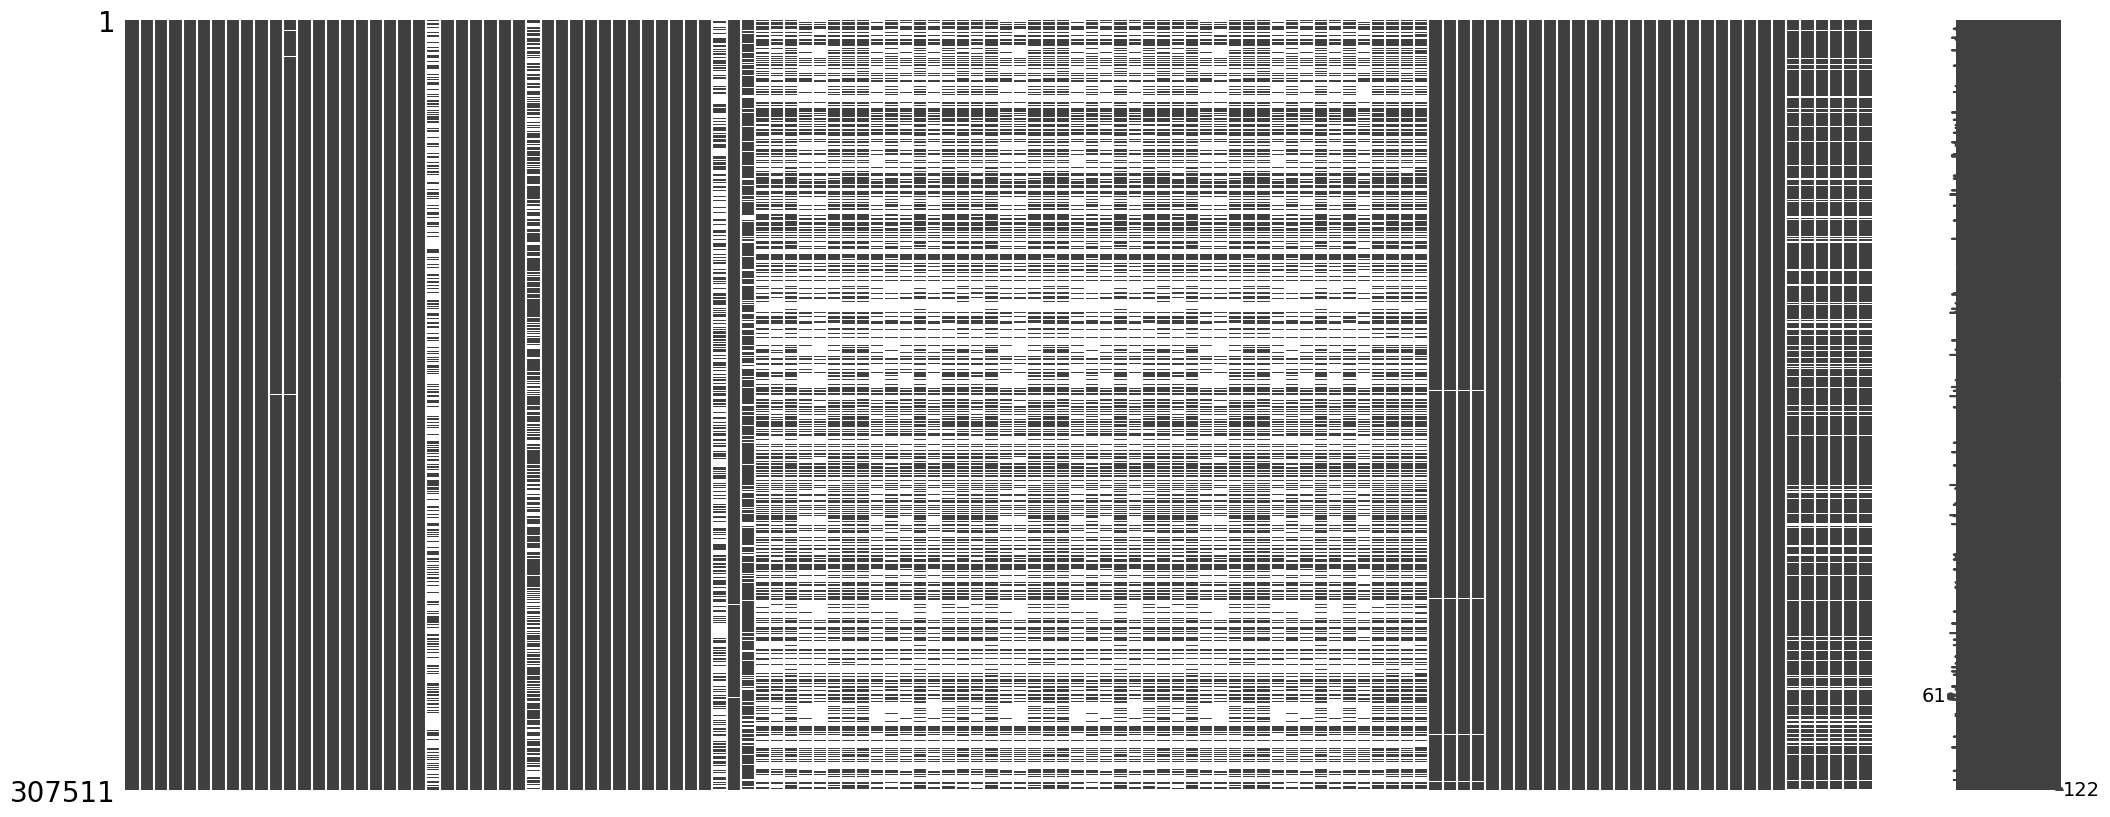

In [16]:
import missingno as mn
mn.matrix(app_df)

Based on the above Matrix, it is evidednt that the dataset has many missing values.\
Let's check for each column what is the % of missing values

In [17]:
null_app_df=round(((app_df.isnull().sum())/app_df.shape[0])*100,2)

In [18]:
null_app_df=pd.DataFrame(null_app_df).reset_index()

In [19]:
null_app_df.columns=['column_name','null_percentage']

In [20]:
print(null_app_df.to_markdown())

|     | column_name                  |   null_percentage |
|----:|:-----------------------------|------------------:|
|   0 | SK_ID_CURR                   |              0    |
|   1 | TARGET                       |              0    |
|   2 | NAME_CONTRACT_TYPE           |              0    |
|   3 | CODE_GENDER                  |              0    |
|   4 | FLAG_OWN_CAR                 |              0    |
|   5 | FLAG_OWN_REALTY              |              0    |
|   6 | CNT_CHILDREN                 |              0    |
|   7 | AMT_INCOME_TOTAL             |              0    |
|   8 | AMT_CREDIT                   |              0    |
|   9 | AMT_ANNUITY                  |              0    |
|  10 | AMT_GOODS_PRICE              |              0.09 |
|  11 | NAME_TYPE_SUITE              |              0.42 |
|  12 | NAME_INCOME_TYPE             |              0    |
|  13 | NAME_EDUCATION_TYPE          |              0    |
|  14 | NAME_FAMILY_STATUS           |              0   

There are many columns in applicationDF dataframe where missing value is more than 40%.\
Let's plot the columns vs missing value % with 40% being the cut-off marks

Text(0.5, 1.0, 'null percentage value')

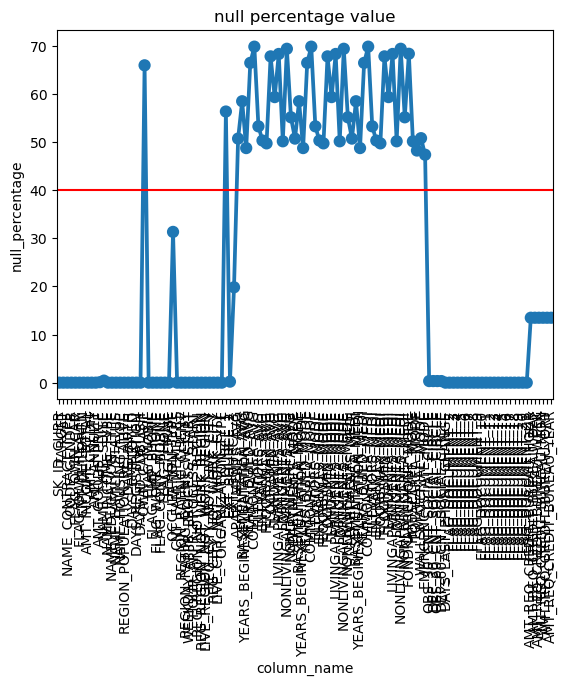

In [21]:
sns.pointplot(data=null_app_df,x='column_name',y='null_percentage').axhline(40,color='red')
plt.rcParams['figure.figsize']=(30,5)
plt.xticks(rotation=90)
plt.title("null percentage value")

In [22]:
null_percent40=null_app_df[null_app_df['null_percentage']>=40]

In [23]:
null_percent40

,column_name,null_percentage
21,OWN_CAR_AGE,65.99
41,EXT_SOURCE_1,56.38
44,APARTMENTS_AVG,50.75
45,BASEMENTAREA_AVG,58.52
46,YEARS_BEGINEXPLUATATION_AVG,48.78
47,YEARS_BUILD_AVG,66.50
48,COMMONAREA_AVG,69.87
49,ELEVATORS_AVG,53.30
50,ENTRANCES_AVG,50.35
51,FLOORSMAX_AVG,49.76


In [24]:
len(null_percent40)

49

<Axes: >

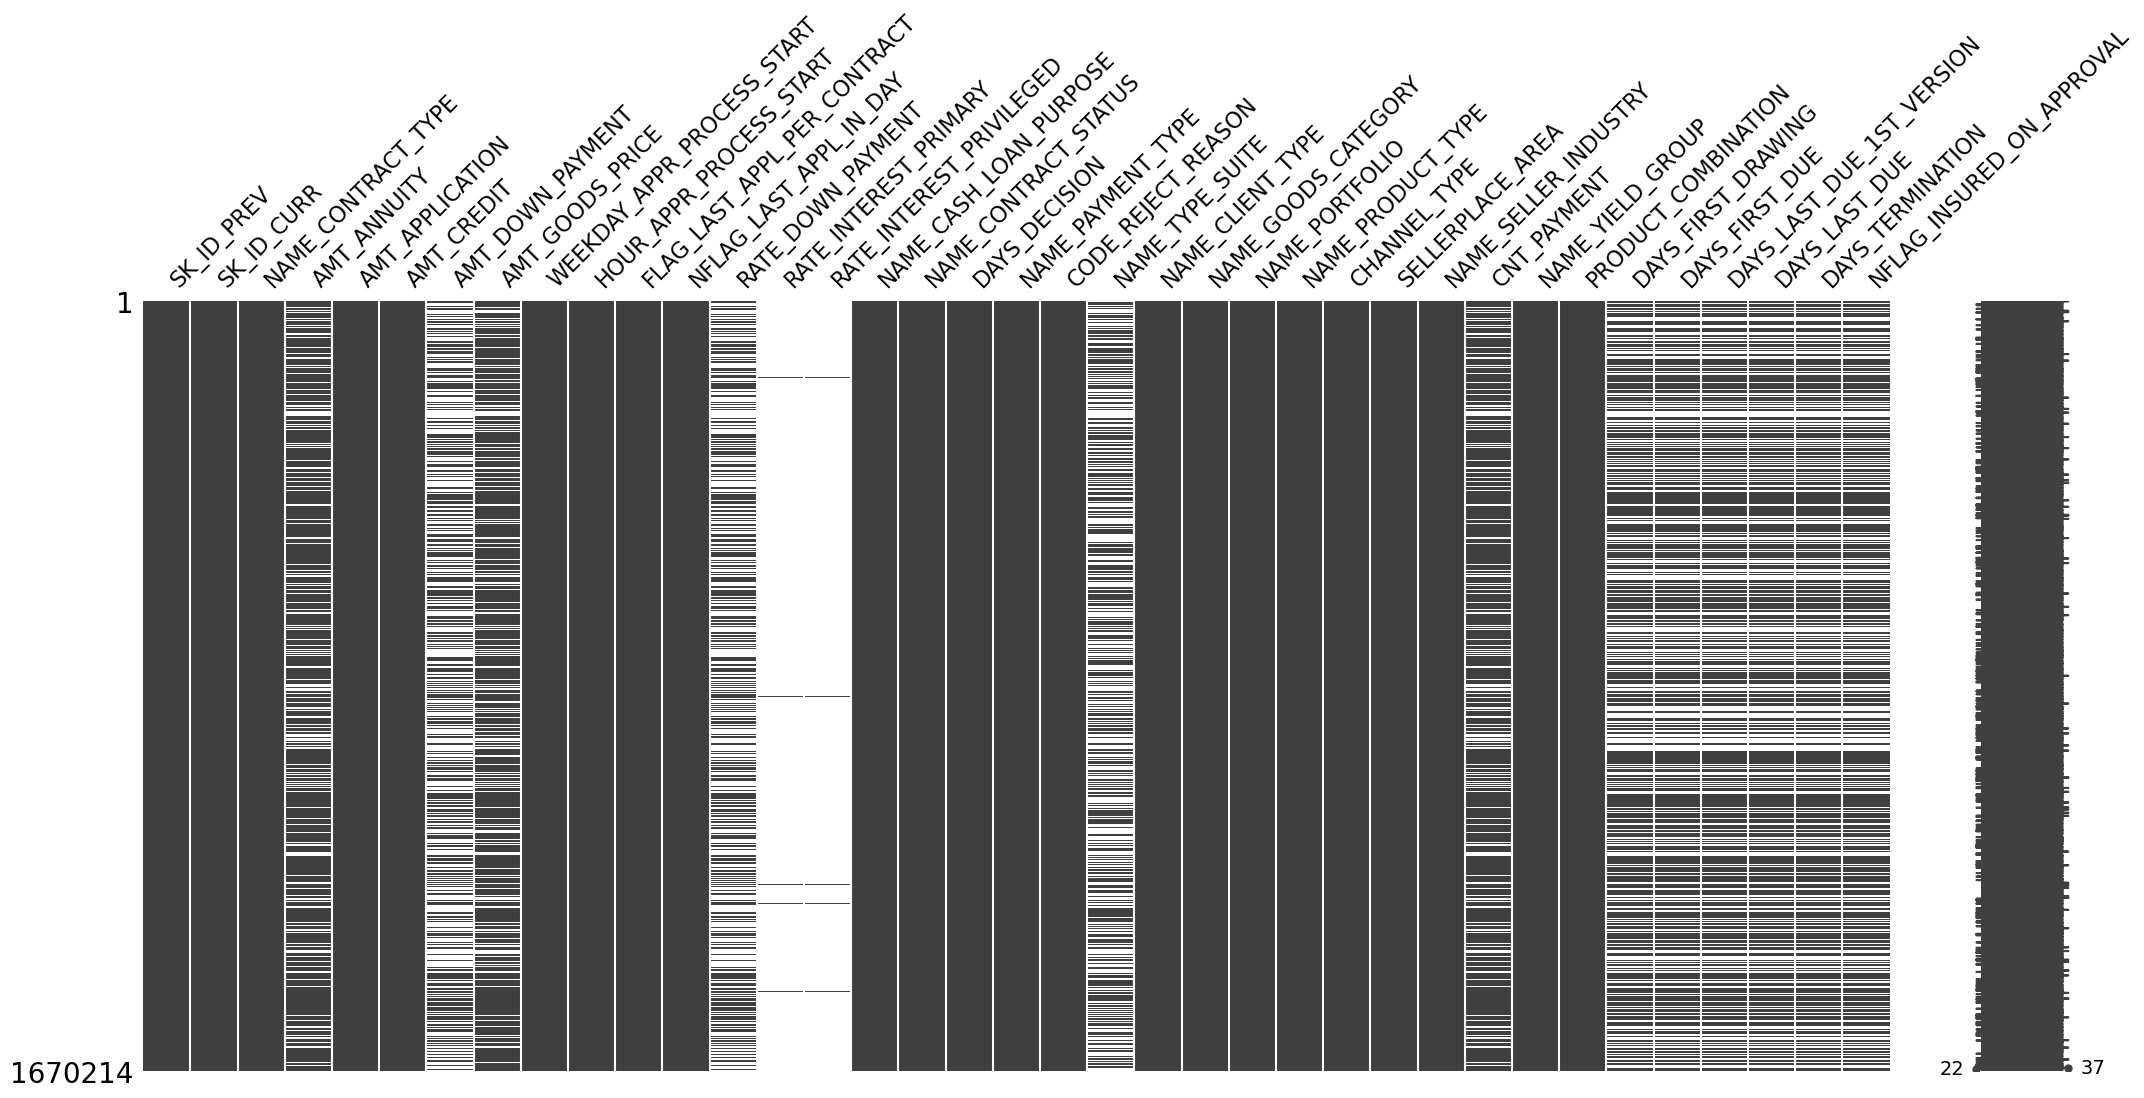

In [25]:
mn.matrix(prev_app_df)

In [26]:
(prev_app_df.isnull().sum())/prev_app_df.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [27]:
null_prev_app=pd.DataFrame(round(((prev_app_df.isnull().sum())/prev_app_df.shape[0])*100,1)).reset_index()

In [28]:
null_prev_app.columns=['column_name','null_percentage']

Text(0.5, 1.0, 'null value percentage')

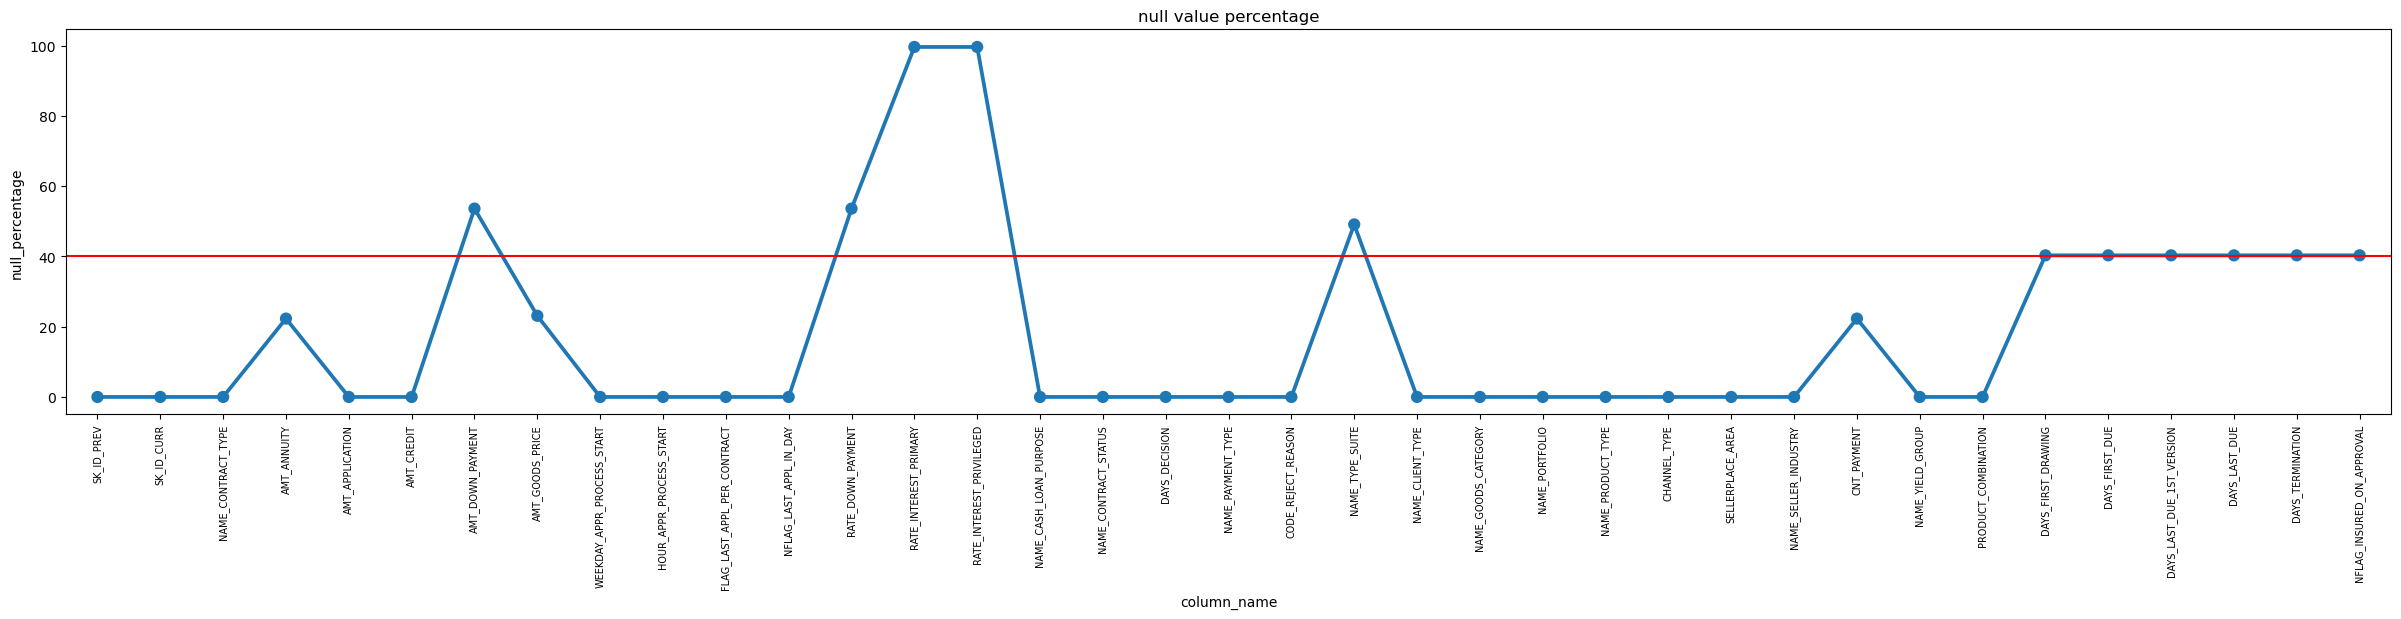

In [29]:
sns.pointplot(data=null_prev_app,x='column_name',y='null_percentage').axhline(40,color='red')
plt.rcParams['figure.figsize']=(6,6)
plt.xticks(rotation=90,fontsize=7)
plt.title("null value percentage")

In [30]:
null_prev40=null_prev_app[null_prev_app['null_percentage']>=40]

In [31]:
null_prev40

,column_name,null_percentage
6,AMT_DOWN_PAYMENT,53.6
12,RATE_DOWN_PAYMENT,53.6
13,RATE_INTEREST_PRIMARY,99.6
14,RATE_INTEREST_PRIVILEGED,99.6
20,NAME_TYPE_SUITE,49.1
31,DAYS_FIRST_DRAWING,40.3
32,DAYS_FIRST_DUE,40.3
33,DAYS_LAST_DUE_1ST_VERSION,40.3
34,DAYS_LAST_DUE,40.3
35,DAYS_TERMINATION,40.3


In [32]:
len(null_prev40)

11

Total of 11 columns are there which have more than 40% null values.\
These columns can be deleted. Before deleting these columns, let's review if there are more columns which can be dropped or not

In [33]:
source=app_df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]

In [34]:
source_corr=source.corr()

<Axes: >

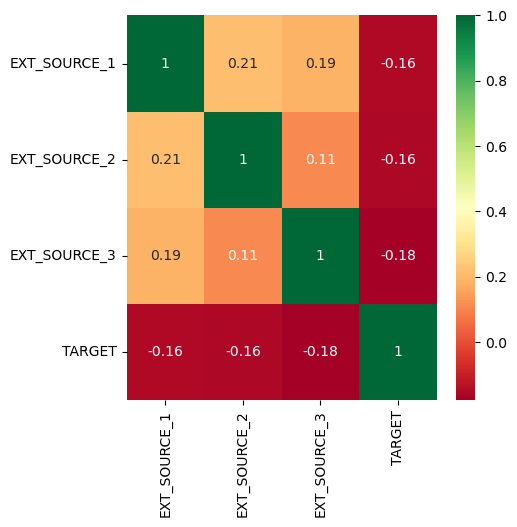

In [35]:
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(data=source.corr(),annot=True, cmap ="RdYlGn",ax=ax)

Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

In [36]:
# create a list of columns that needs to be dropped including the columns with >40% null values
unwanted_app=null_percent40['column_name'].tolist()+['EXT_SOURCE_2','EXT_SOURCE_3']

In [37]:
len(unwanted_app)

51

In [38]:
col_doc=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
         'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
         'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
         'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [39]:
df_flag=app_df[col_doc+['TARGET']]
length=len(col_doc)

In [40]:
df_flag

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307508,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307509,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df_flag['TARGET']=df_flag['TARGET'].replace({1:'Defaulter',0:'Repayer'})

In [42]:
df_flag

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Defaulter
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
307507,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
307508,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Repayer
307509,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Defaulter


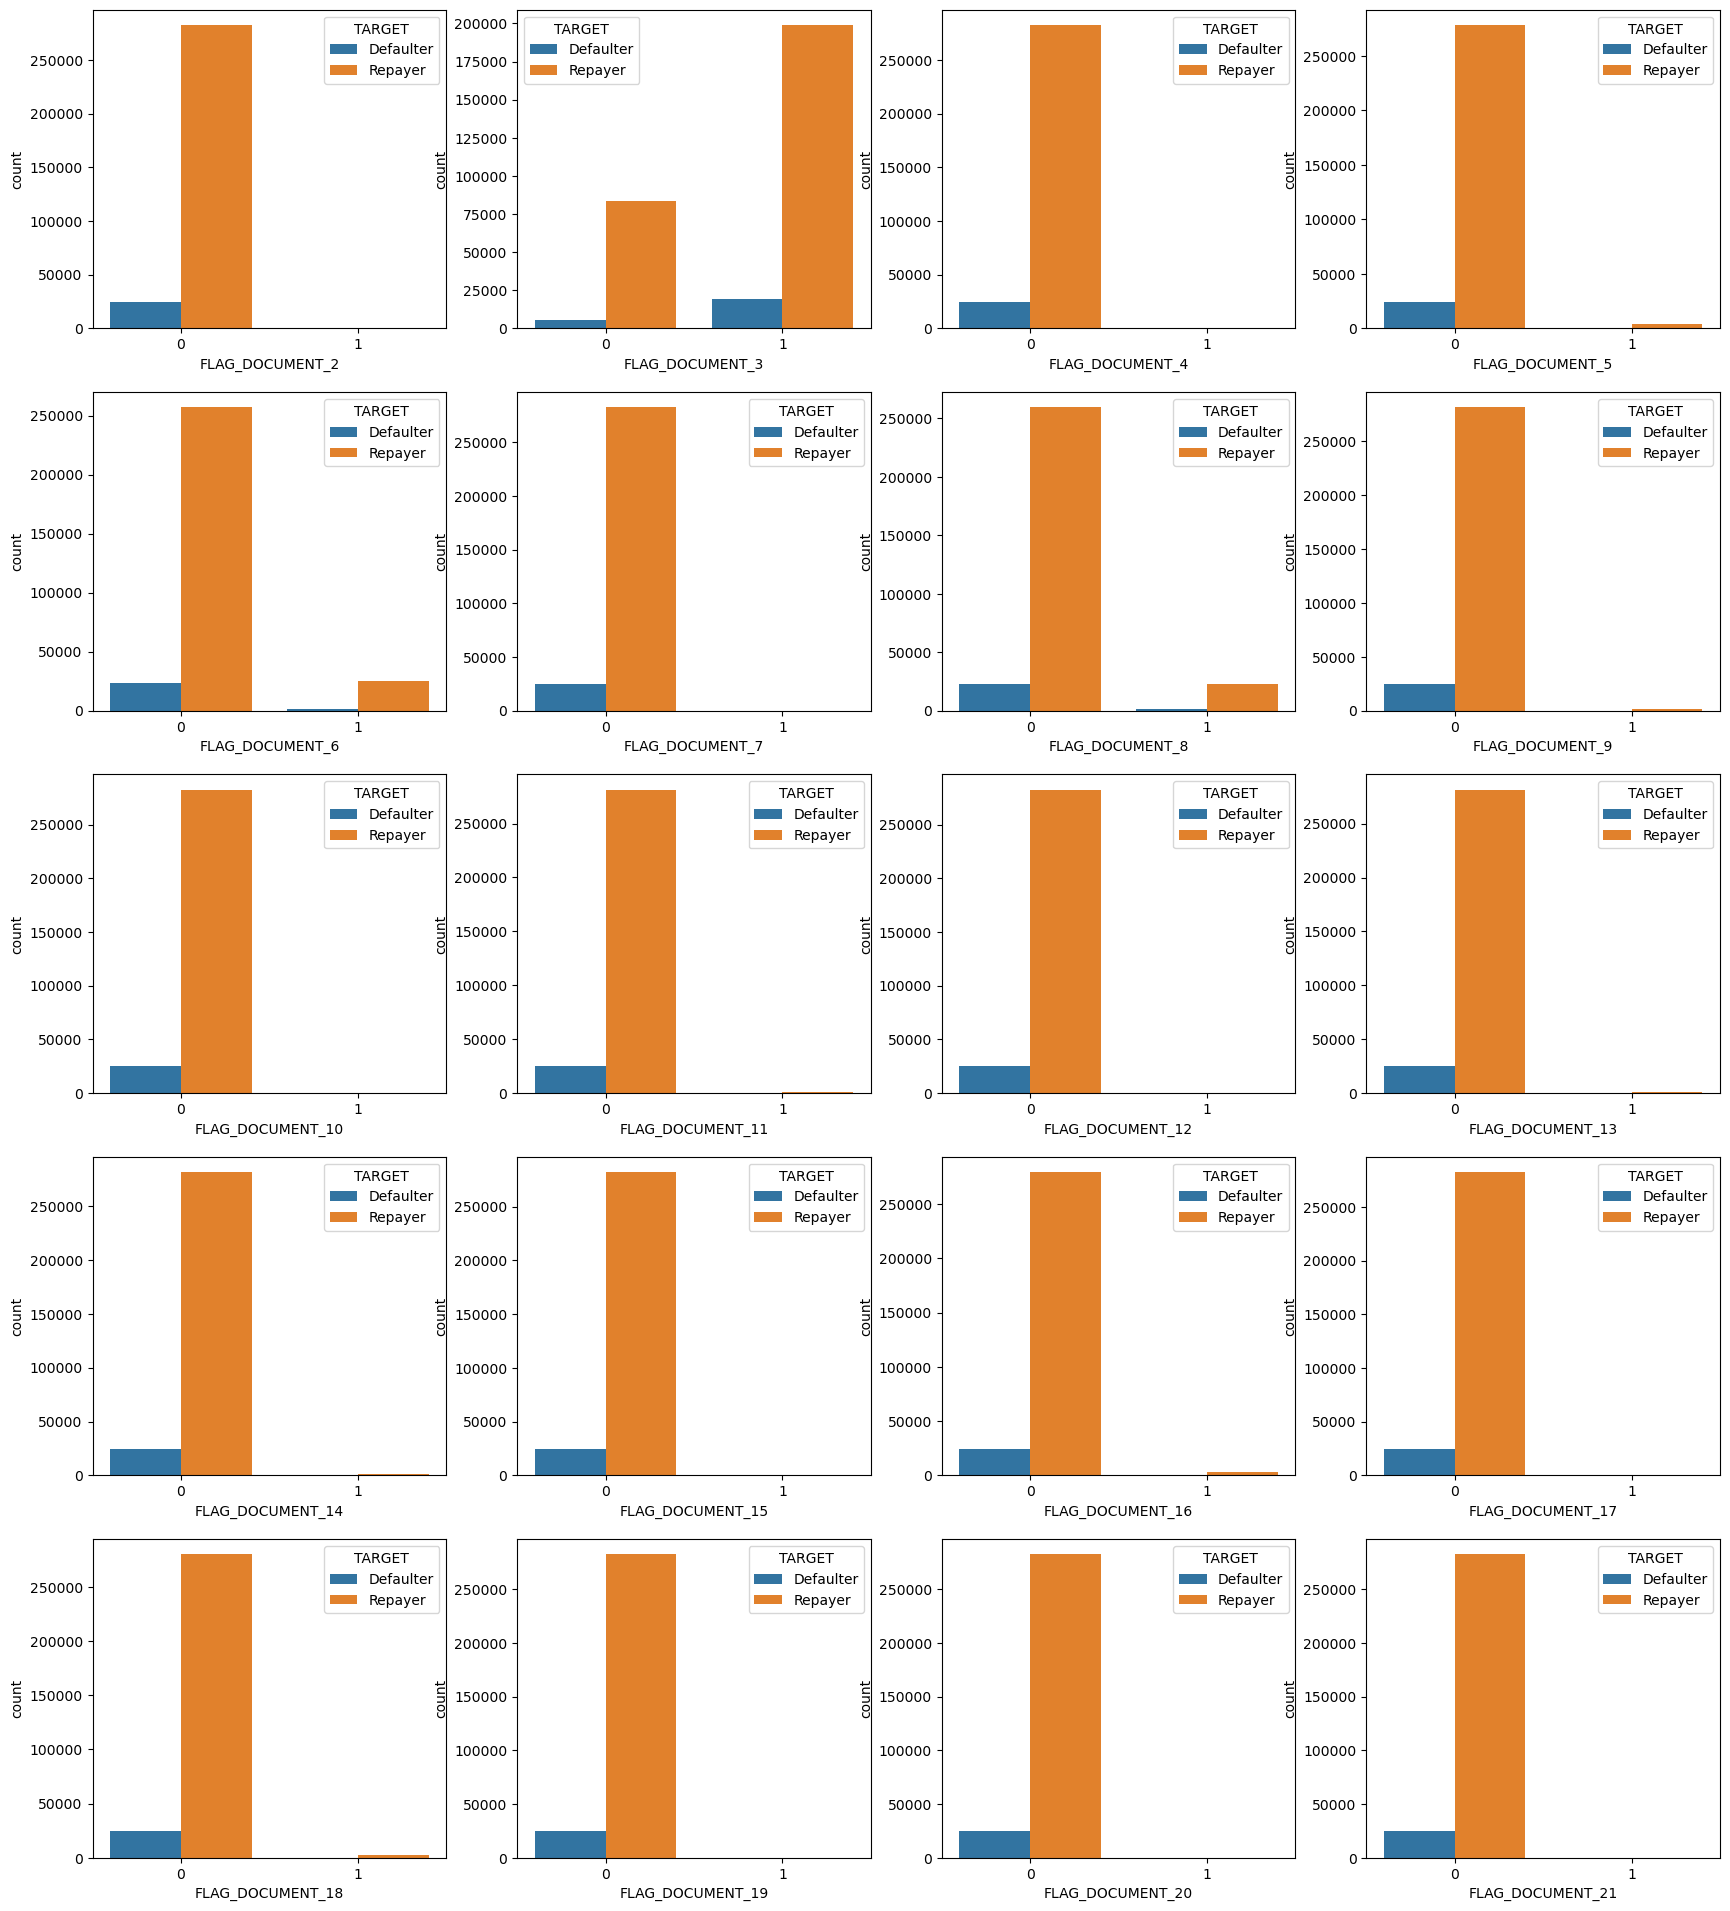

In [43]:
fig,ax=plt.subplots(5,4,figsize=(21,24))
for i,j in zip(col_doc,ax.ravel()):
    sns.countplot(x=df_flag[i],data=df_flag,hue=df_flag['TARGET'],ax=j)
    

In [44]:
col_doc.remove('FLAG_DOCUMENT_3')
unwanted_app=unwanted_app+col_doc
len(unwanted_app)

70

In [45]:
contact_col=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
             'TARGET']

In [46]:
contact_col

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'TARGET']

In [47]:
contact_corr=app_df[contact_col].corr

<Axes: >

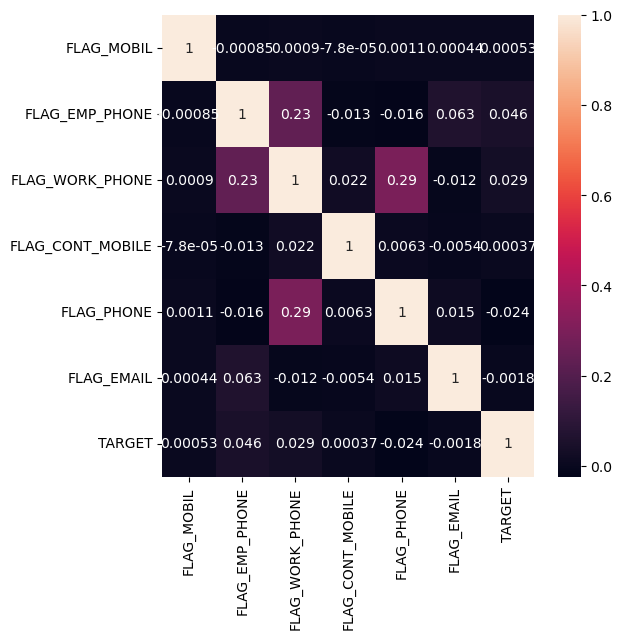

In [48]:
sns.heatmap(data=contact_corr(),annot=True)

In [49]:
contact_col.remove('TARGET')
unwanted_app=unwanted_app+contact_col

In [50]:
len(unwanted_app)

76

Total 76 columns can be deleted from applicationDF

In [51]:
app_df.drop(labels=unwanted_app,axis=1,inplace=True)

In [52]:
app_df.shape

(307511, 46)

After deleting unnecessary columns, there are 46 columns remaining in applicationDF

In [53]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [54]:
unwanted_prev=null_prev40['column_name'].tolist()

In [55]:
unwanted_prev

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [56]:
unnecessary_prev=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [57]:
unwanted_prev=unwanted_prev+unnecessary_prev

In [58]:
len(unwanted_prev)

15

Total 15 columns can be deleted from previousDF

In [59]:
prev_app_df.drop(labels=unwanted_prev,axis=1,inplace=True)

In [60]:
prev_app_df.shape

(1670214, 22)

After deleting unnecessary columns, there are 22 columns remaining in applicationDF

## Standardize Values

In [61]:
pd.set_option('display.max_columns', None)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Convert DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days cannot be negative.\
Convert DAYS_BIRTH from negative to positive values and calculate age and create categorical bins columns.\
Categorize the amount variables into bins.\
Convert region rating column and few other columns to categorical.

In [62]:
date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for i in date_col:
    app_df[i] = abs(app_df[i])

In [63]:
app_df['AMT_INCOME_TOTAL']=app_df['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

app_df['AMT_INCOME_RANGE']=pd.cut(app_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [64]:
app_df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

More than 50% loan applicants have income amount in the range of 100K-200K.\
Almost 92% loan applicants have income less than 300K

In [65]:
app_df['AMT_CREDIT']=app_df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

app_df['AMT_CREDIT_RANGE']=pd.cut(app_df['AMT_CREDIT'],bins=bins,labels=slots)

In [66]:
app_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

More Than 16% loan applicants have taken loan which amounts to more than 1M.

In [67]:
app_df['AGE'] = app_df['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']
app_df['AGE_GROUP']=pd.cut(app_df['AGE'],bins=bins,labels=slots)

In [68]:
app_df['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.

In [69]:
app_df['YEARS_EMPLOYED'] = app_df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

app_df['EMPLOYMENT_YEAR']=pd.cut(app_df['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [70]:
app_df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience

In [71]:
app_df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

## Data Type Conversion

In [72]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

Numeric columns are already in int64 and float64 format. Hence proceeding with other columns

In [73]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    app_df[col] =pd.Categorical(app_df[col])

In [74]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

 #### Standardize Values for previousDF

In [75]:
prev_app_df.nunique().sort_values() 

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [76]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [77]:
prev_app_df['DAYS_DECISION'] = abs(prev_app_df['DAYS_DECISION'])

In [78]:
#age group calculation e.g. 388 will be grouped as 300-400
prev_app_df['DAYS_DECISION_GROUP'] = (prev_app_df['DAYS_DECISION']-(prev_app_df['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((prev_app_df['DAYS_DECISION'] - (prev_app_df['DAYS_DECISION'] % 400)) + (prev_app_df['DAYS_DECISION'] % 400) + (400 - (prev_app_df['DAYS_DECISION'] % 400))).astype(str)

In [79]:
prev_app_df['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

Almost 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision

In [80]:
#Converting previous application Categorical columns from Object to categorical 
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Catgorical_col_p:
    prev_app_df[col] =pd.Categorical(prev_app_df[col])

In [81]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

#### Null Value Data Imputation

To impute null values in categorical variables which has lower null percentage, mode() is used to impute the most frequent items.\
To impute null values in categorical variables which has higher null percentage, a new category is created.\
To impute null values in numerical variables which has lower null percentage, median() is used as it will robust to outliers.\
Mean returned decimal values and median returned whole numbers and the columns were number of requests.

In [82]:
round(app_df.isnull().sum() / app_df.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

In [83]:
app_df['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [84]:
app_df['NAME_TYPE_SUITE'].fillna((app_df['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis:

In [85]:
app_df['OCCUPATION_TYPE'] = app_df['OCCUPATION_TYPE'].cat.add_categories('Unknown')
app_df['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)

In [86]:
app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Impute with median as mean has decimals and this is number of requests

In [87]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    app_df[col].fillna(app_df[col].median(),inplace = True)

In [88]:
round(prev_app_df.isnull().sum() / prev_app_df.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

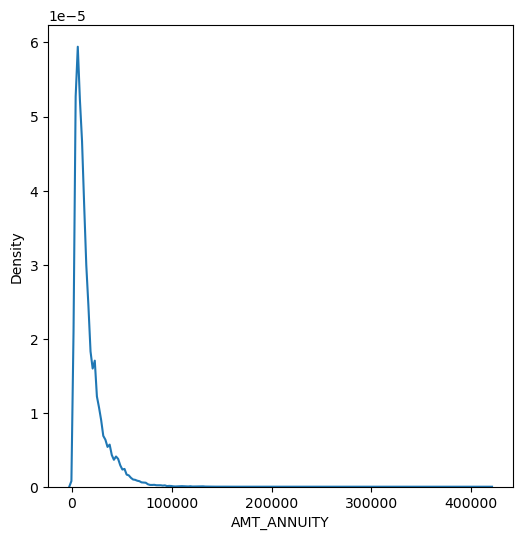

In [89]:
plt.figure(figsize=(6,6))
sns.kdeplot(prev_app_df['AMT_ANNUITY'])
plt.show()

There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.

In [90]:
prev_app_df['AMT_ANNUITY'].fillna(prev_app_df['AMT_ANNUITY'].median(),inplace = True)

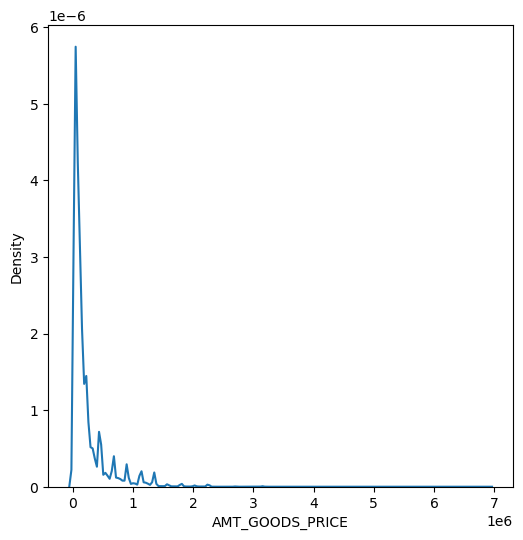

In [91]:
plt.figure(figsize=(6,6))
sns.kdeplot(prev_app_df['AMT_GOODS_PRICE'][pd.notnull(prev_app_df['AMT_GOODS_PRICE'])])
plt.show()

There are several peaks along the distribution.\
Let's impute using the mode, mean and median and see if the distribution is still about the same.

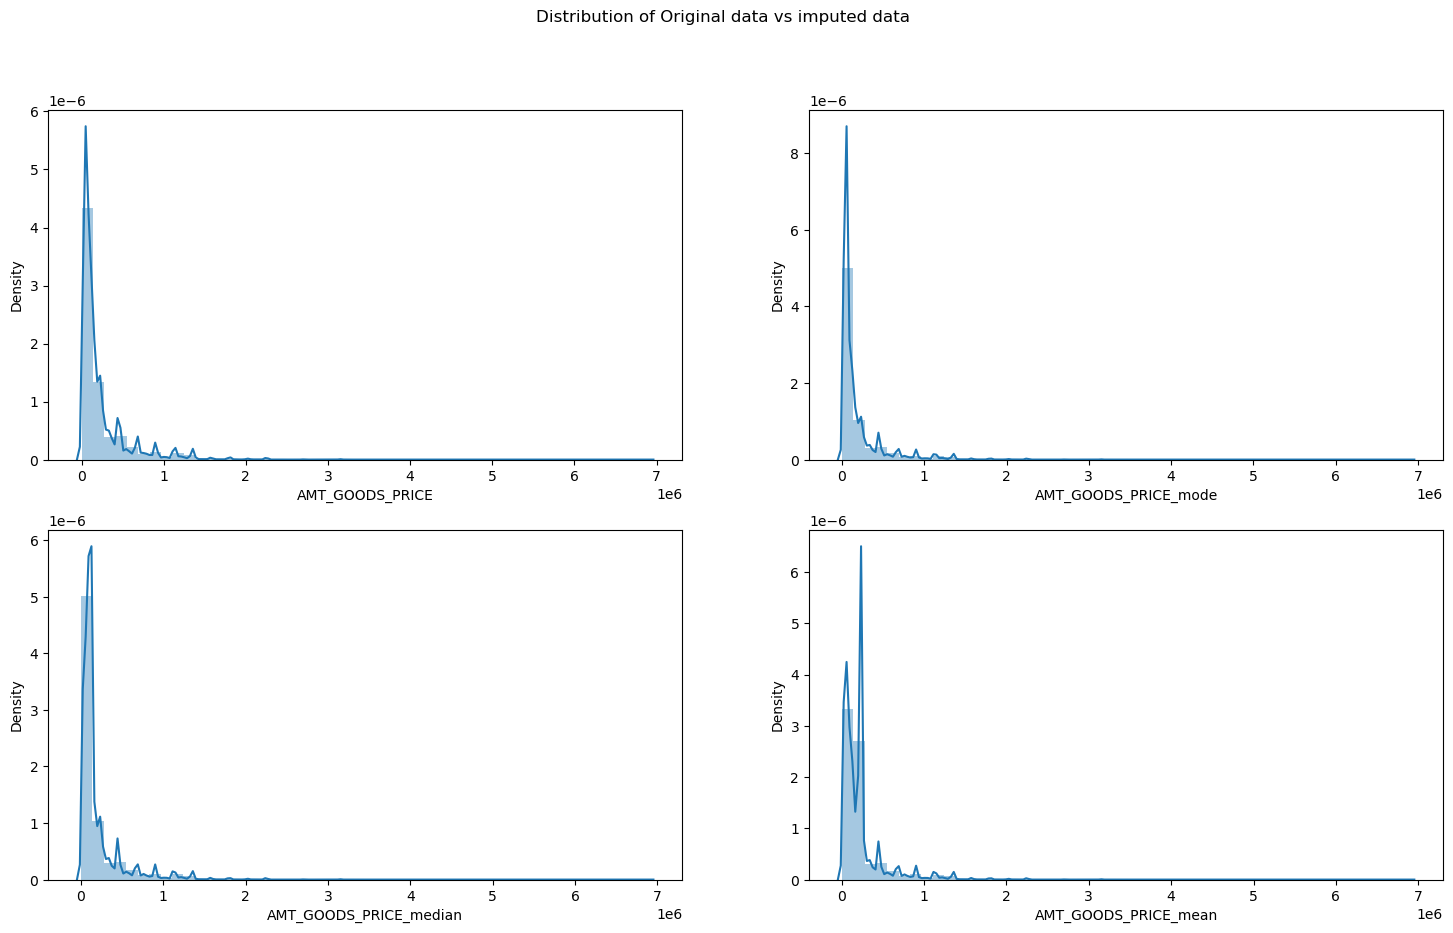

In [92]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['AMT_GOODS_PRICE_mode'] = prev_app_df['AMT_GOODS_PRICE'].fillna(prev_app_df['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = prev_app_df['AMT_GOODS_PRICE'].fillna(prev_app_df['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = prev_app_df['AMT_GOODS_PRICE'].fillna(prev_app_df['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(prev_app_df['AMT_GOODS_PRICE'][pd.notnull(prev_app_df['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

The original distribution is closer with the distribution of data imputed with mode in this case

In [93]:
prev_app_df['AMT_GOODS_PRICE'].fillna(prev_app_df['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [94]:
prev_app_df[prev_app_df['CNT_PAYMENT'].isnull()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

Impute CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [95]:
prev_app_df['CNT_PAYMENT'].fillna(0,inplace = True)

In [96]:
round(prev_app_df.isnull().sum() / prev_app_df.shape[0] * 100.00,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
dtype: float64

We still have few null values in the PRODUCT_COMBINATION column. We can ignore as this percentage is very less.

### Identifying the outliers

<Figure size 600x600 with 0 Axes>

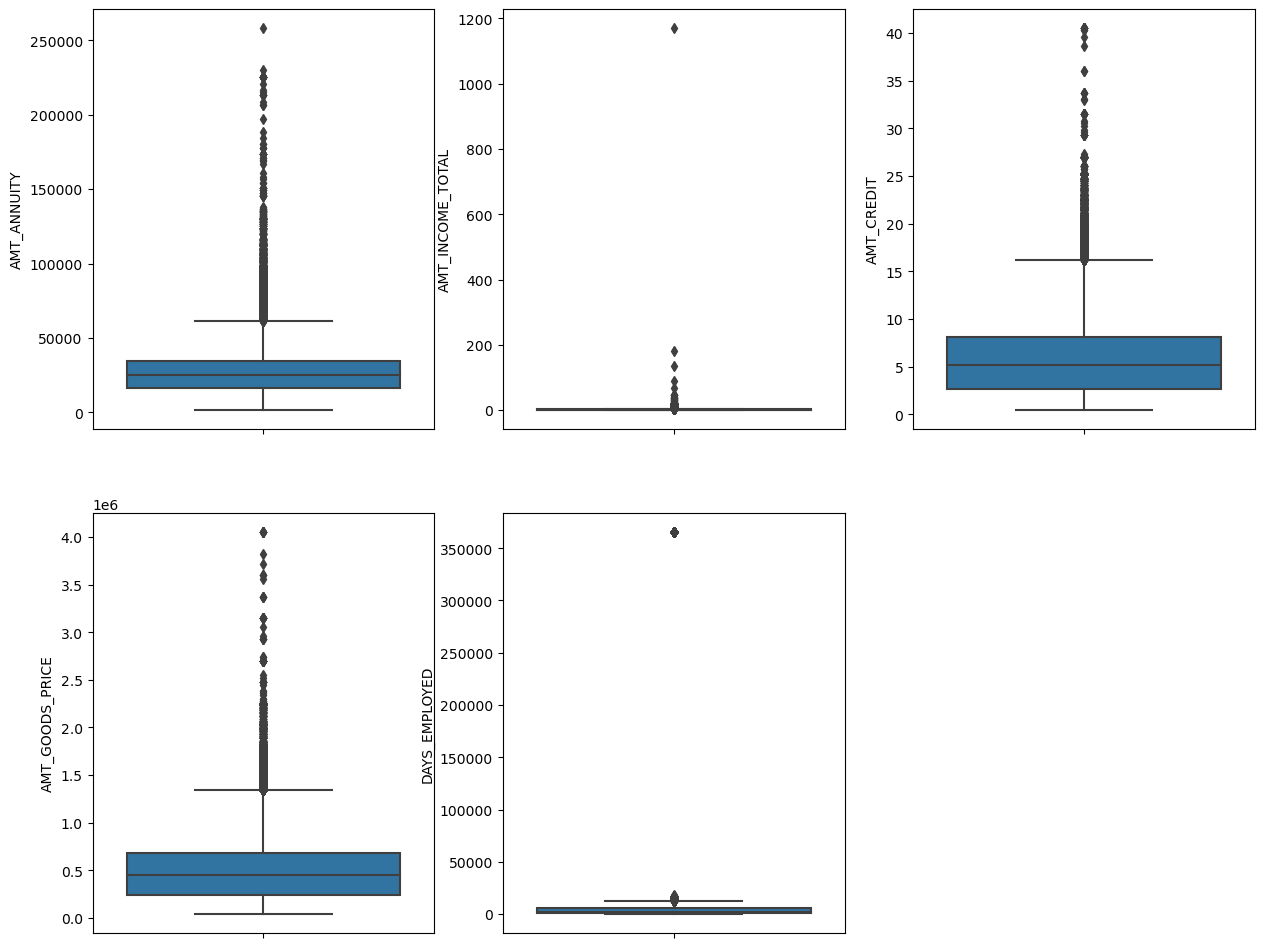

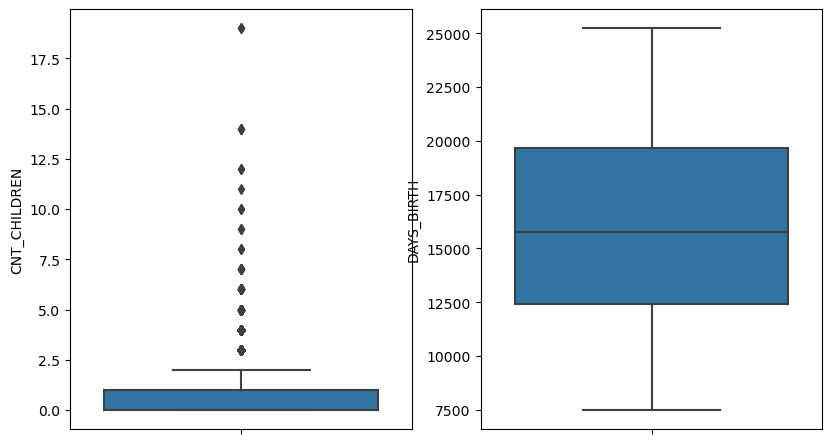

In [97]:
app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
plt.subplots_adjust(hspace=0.5)
fig1,ax1=plt.subplots(figsize=(15, 12))
for i,j in enumerate(app_outlier_col_1):
    ax1=plt.subplot(2,3,i+1)
    sns.boxplot(y=app_df[j],ax=ax1)
fig2,ax2=plt.subplots(figsize=(15, 12))
for i,j in enumerate(app_outlier_col_2):
    ax2=plt.subplot(2,3,i+1)
    sns.boxplot(y=app_df[j],ax=ax2)

AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.\
AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.\
DAYS_BIRTH has no outliers which means the data available is reliable.\
DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

### Finding outlier information in previousDF

<Figure size 600x600 with 0 Axes>

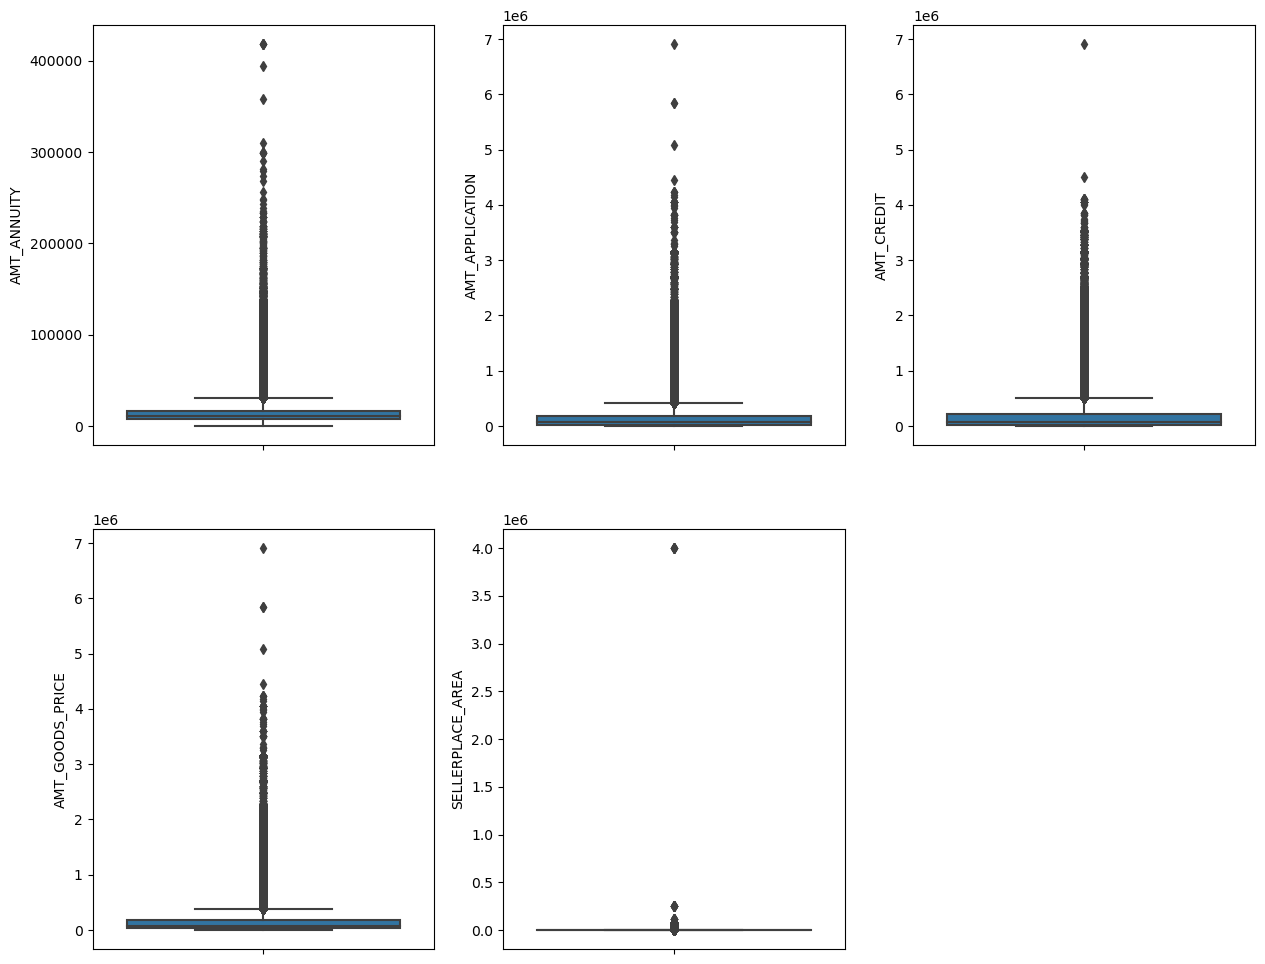

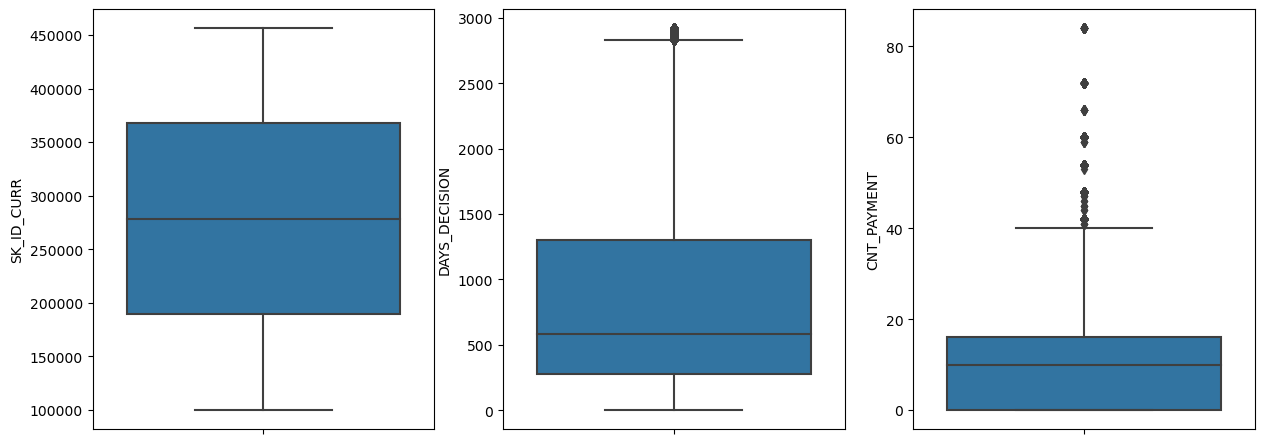

In [98]:
prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
plt.subplots_adjust(hspace=0.5)
fig1,ax1=plt.subplots(figsize=(15, 12))
for i,j in enumerate(prev_outlier_col_1):
    ax1=plt.subplot(2,3,i+1)
    sns.boxplot(y=prev_app_df[j],ax=ax1)
fig2,ax2=plt.subplots(figsize=(15, 12))
for i,j in enumerate(prev_outlier_col_2):
    ax2=plt.subplot(2,3,i+1)
    sns.boxplot(y=prev_app_df[j],ax=ax2)

AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.\
CNT_PAYMENT has few outlier values.\
SK_ID_CURR is an ID column and hence no outliers.\
DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

 # Data Analysis

### Imbalance in Data

In [99]:
Imbalance=app_df["TARGET"].value_counts().reset_index()
Imbalance['index'].replace(0,'Repayer',inplace=True)
Imbalance['index'].replace(1,'defaulter',inplace=True)
print(Imbalance)

       index  TARGET
0    Repayer  282686
1  defaulter   24825


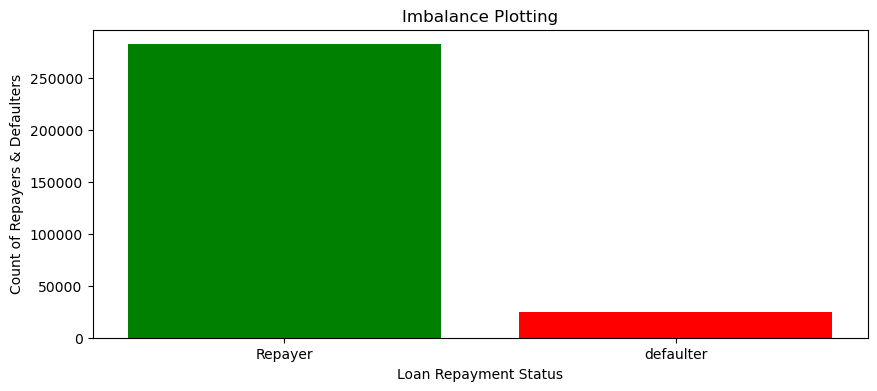

In [100]:
plt.figure(figsize=(10,4))
plt.bar(Imbalance['index'],Imbalance['TARGET'],color= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting") 
plt.show()

In [101]:
Repayer=Imbalance.iloc[0]["TARGET"]
Default=Imbalance.iloc[1]["TARGET"]
Repayer_percent=round((Repayer/(Repayer+Default))*100,2)
Default_percent=round((Default/(Repayer+Default))*100,2)

In [102]:
print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(Repayer_percent,Default_percent))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(Repayer/Default))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93 and 8.07
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39 : 1 (approx)


In [147]:
default_df=app_df[app_df['TARGET']==1]

In [178]:
def univariate_categorical(column,figsize=(10,5),label_rotation1=False,label_rotation2=False):
    fig,ax=plt.subplots(1,2,figsize=figsize)
    sns.countplot(x=column, data=app_df,hue='TARGET',palette=['g','r'],ax=ax[0])
    ax[0].set_title('amount of categories')
    ax[0].legend(loc='upper right', labels=['Repayer', 'Defaulter'])
    if(label_rotation1):
        ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45)
        
    list1=[]
    list2=[]
    percent=[]
    total=0
    default_list1=[]
    default_list2=[]
    default_df=app_df[app_df['TARGET']==1]
    for i in range(app_df[column].value_counts().shape[0]):
        list1.append(app_df[column].value_counts()[i])
        list2.append(app_df[column].value_counts().index[i])
        
    for i in range(default_df[column].value_counts().shape[0]):
        default_list1.append(default_df[column].value_counts()[i])
        default_list2.append(default_df[column].value_counts().index[i])
        total=total+default_list1[i]
        
    for i in range(len(default_list1)):
        percentage=round((default_list1[i]/total)*100,2)
        percent.append(percentage)
    sns.barplot(x=list2,y=percent,palette='Set2',ax=ax[1])
    ax[1].set_title('Percentage of Default')
    if(label_rotation2):
        ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45)
        

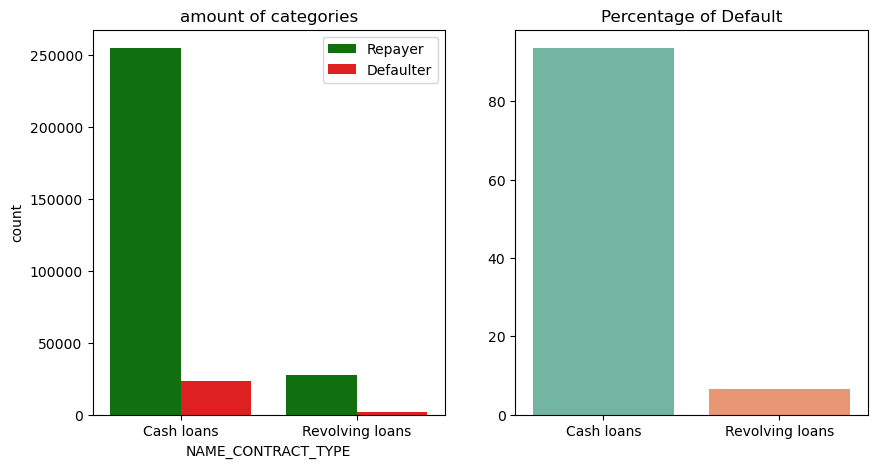

In [179]:
univariate_categorical('NAME_CONTRACT_TYPE')

Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

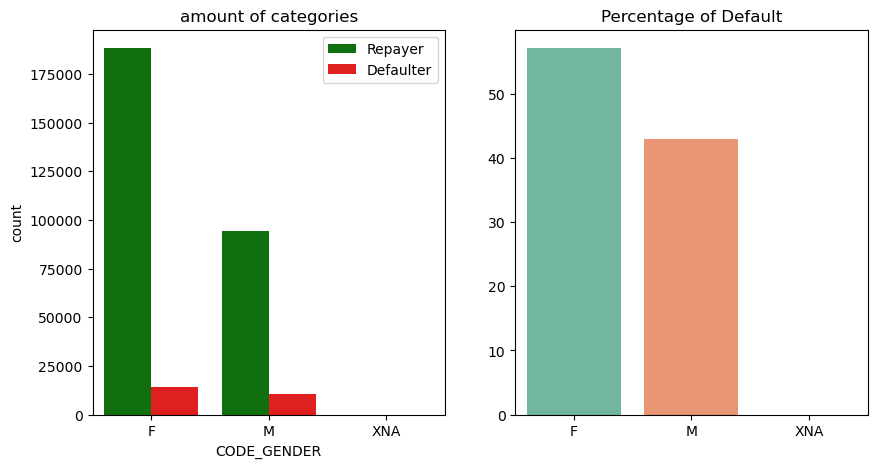

In [180]:
univariate_categorical('CODE_GENDER')

The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans comparing with women.

['N', 'Y']


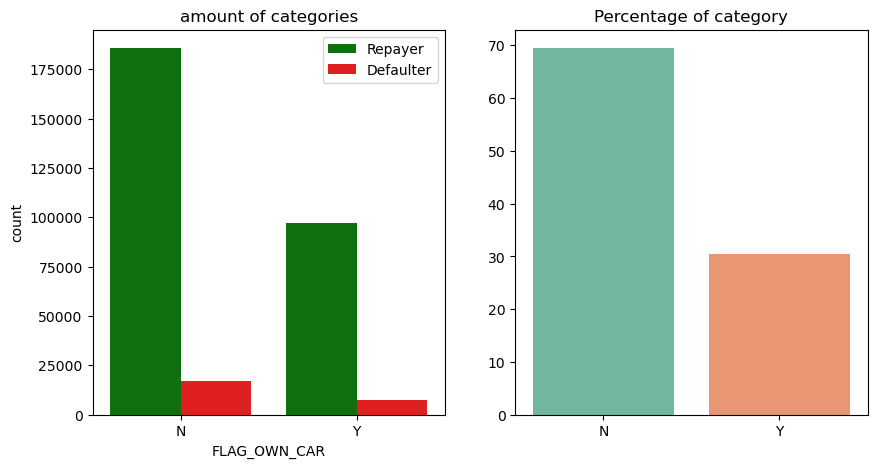

In [160]:
univariate_categorical('FLAG_OWN_CAR')

Clients who own a car are half in number of the clients who dont own a car.\
But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.

['Y', 'N']


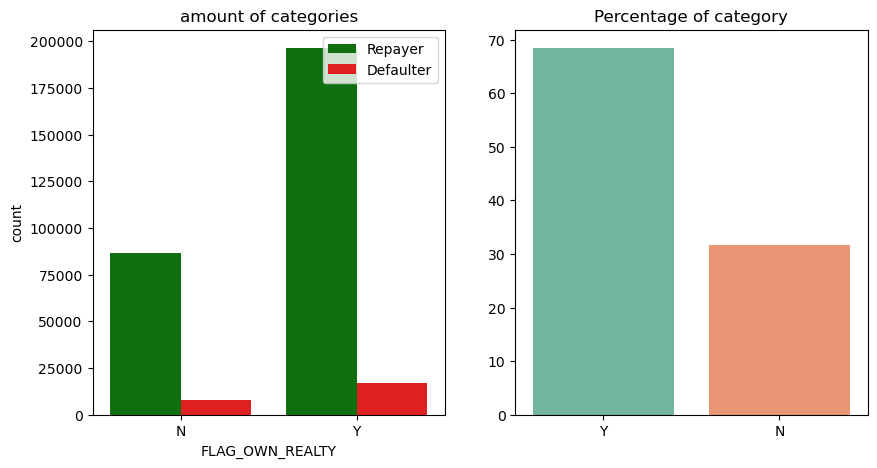

In [161]:
univariate_categorical('FLAG_OWN_REALTY')

The clients who own real estate are more than double of the ones that don't own.\
But the defaulting rate of both categories are around the same (~8%).\
Thus there is no correlation between owning a reality and defaulting the loan

['House / apartment', 'With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment']


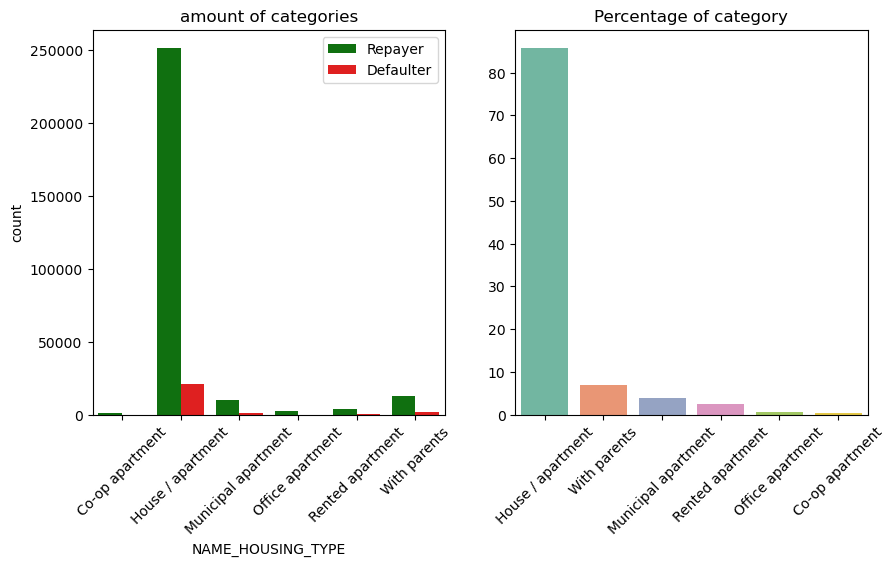

In [162]:
univariate_categorical("NAME_HOUSING_TYPE",(10,5),True,True)

Majority of people live in House/apartment.\
People living in office apartments have lowest default rate.\
People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting.

['Married', 'Single / not married', 'Civil marriage', 'Separated', 'Widow', 'Unknown']


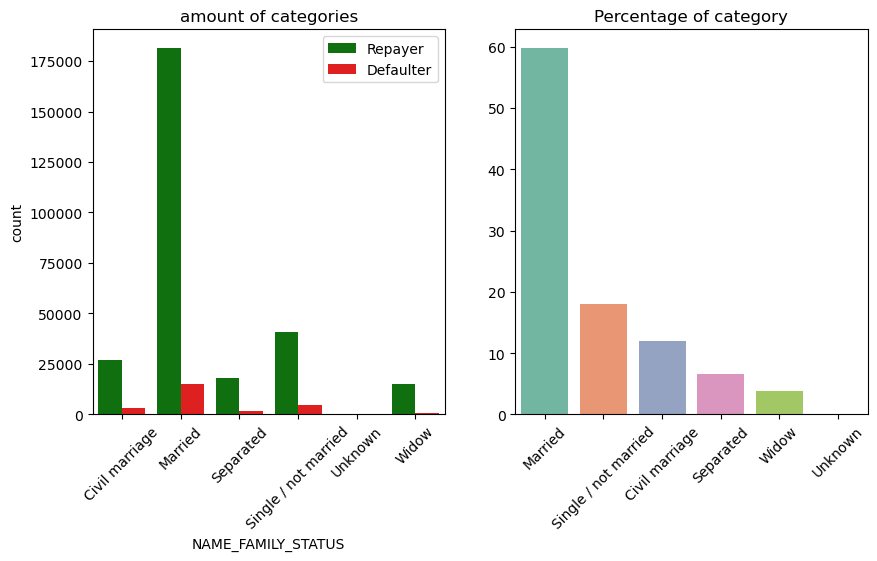

In [164]:
univariate_categorical("NAME_FAMILY_STATUS",(10,5),True,True)

Most of the people who have taken loan are married, followed by Single/not married and civil marriage.\
In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

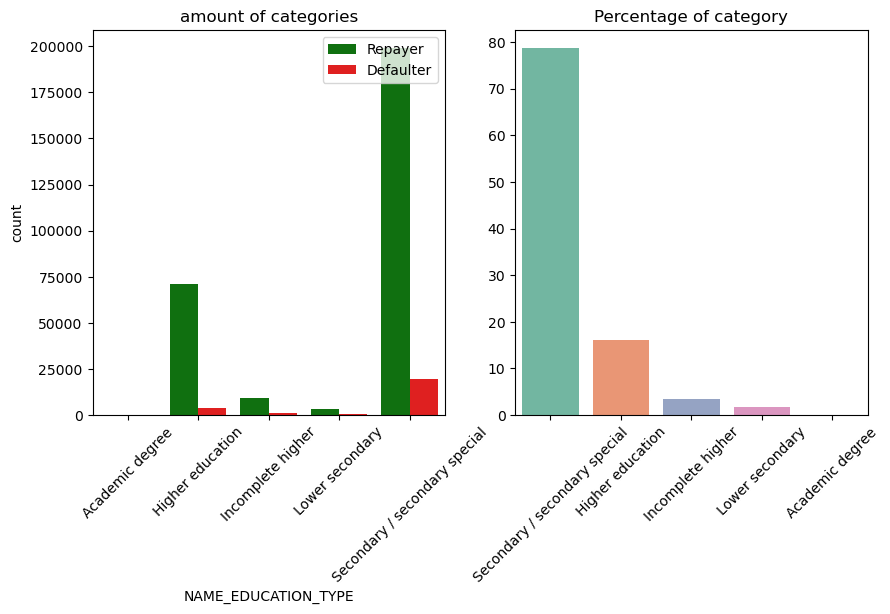

In [113]:
univariate_categorical("NAME_EDUCATION_TYPE",True,True)

Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.\
The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate.\

['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Unemployed', 'Maternity leave', 'Businessman', 'Student']


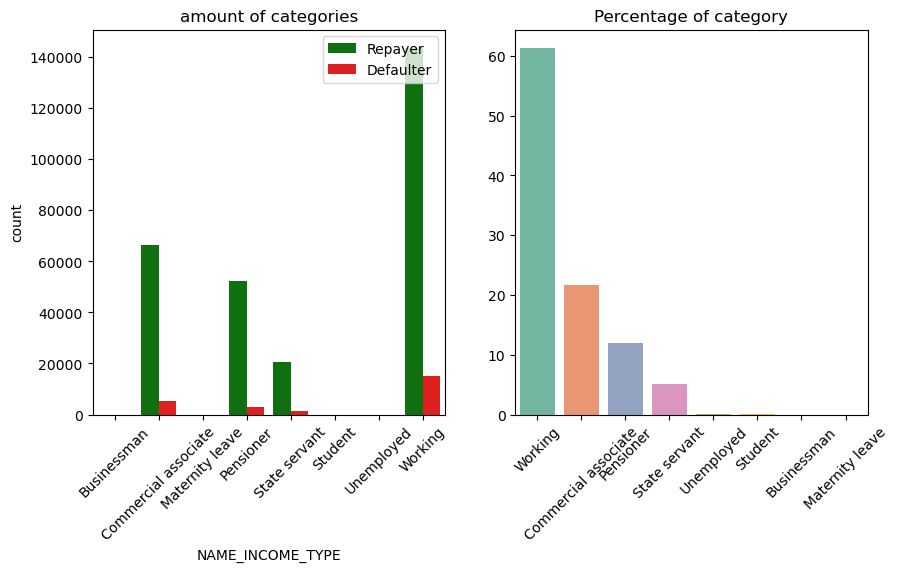

In [165]:
univariate_categorical("NAME_INCOME_TYPE",(10,5),True,True)

Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.\
The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%).\
The rest of types of incomes are under the average of 10% for not returning loans.\
Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.

Text(0.5, 1.0, 'Percentage of Default')

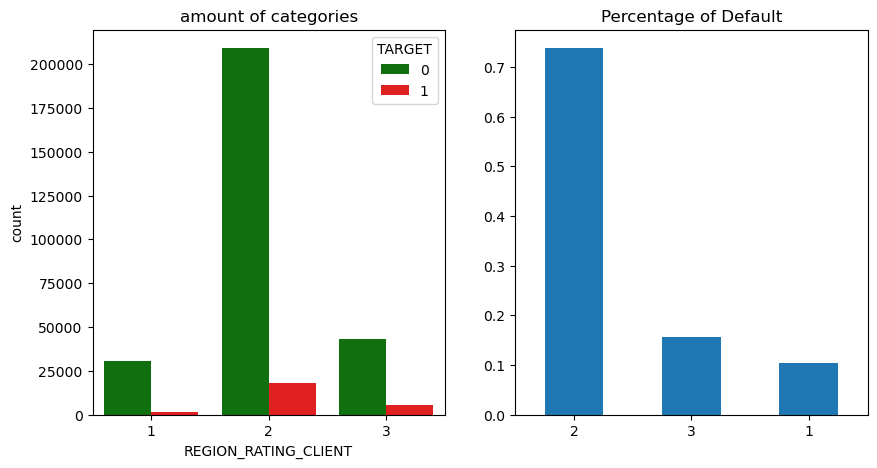

In [185]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='REGION_RATING_CLIENT', data=app_df,hue='TARGET',palette=['g','r'],ax=ax[0])
app_df['REGION_RATING_CLIENT'].value_counts(normalize=True).plot(kind='bar',rot=0)
ax[0].set_title('amount of categories')
ax[1].set_title('Percentage of Default')

Most of the applicants are living in Region_Rating 2 place.\
Region Rating 3 has the highest default rate (11%)\
Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans

['Unknown', 'Laborers', 'Sales staff', 'Drivers', 'Core staff', 'Managers', 'Security staff', 'High skill tech staff', 'Cooking staff', 'Medicine staff', 'Accountants', 'Cleaning staff', 'Low-skill Laborers', 'Private service staff', 'Waiters/barmen staff', 'Secretaries', 'Realty agents', 'HR staff', 'IT staff']


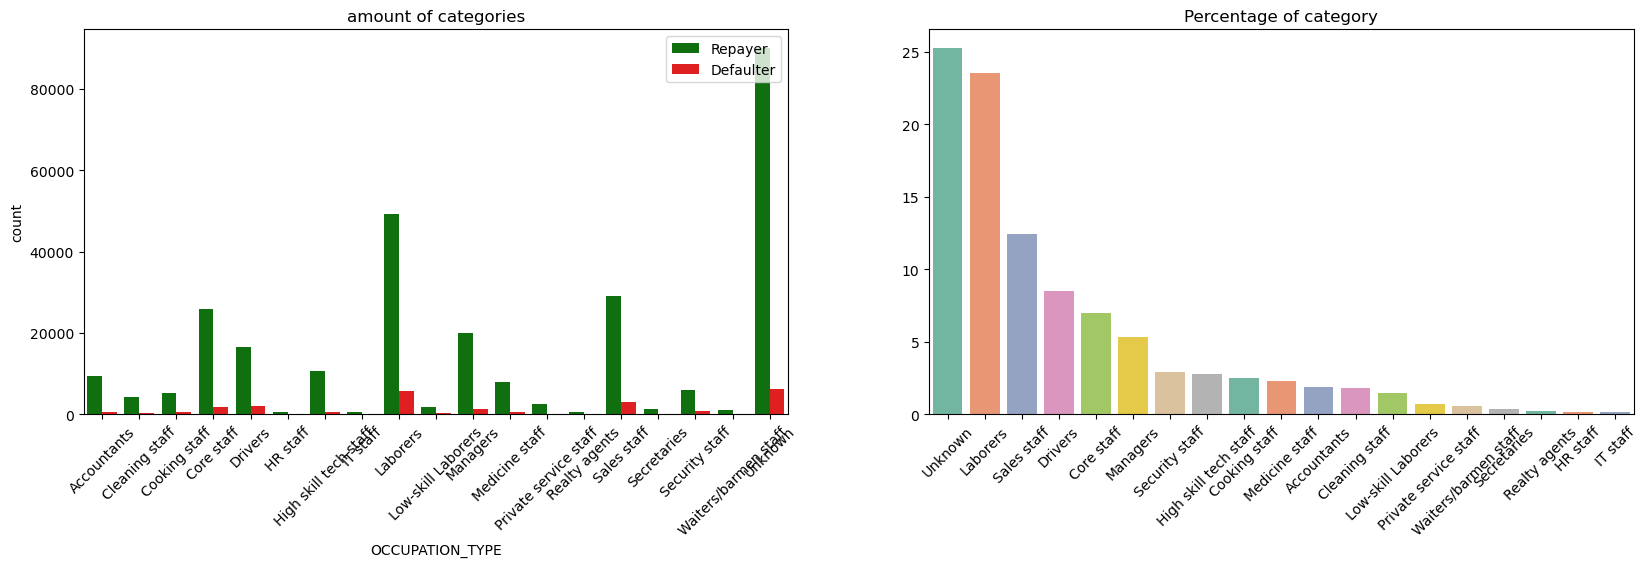

In [129]:
univariate_categorical("OCCUPATION_TYPE",(20,5),True,True)

Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.\
The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

['Business Entity Type 3', 'Self-employed', 'XNA', 'Other', 'Business Entity Type 2', 'Construction', 'Trade: type 7', 'Medicine', 'Government', 'School', 'Transport: type 4', 'Business Entity Type 1', 'Kindergarten', 'Trade: type 3', 'Industry: type 3', 'Security', 'Agriculture', 'Housing', 'Industry: type 11', 'Industry: type 9', 'Restaurant', 'Transport: type 3', 'Postal', 'Transport: type 2', 'Military', 'Trade: type 2', 'Bank', 'Police', 'Industry: type 1', 'Industry: type 7', 'Services', 'Security Ministries', 'Industry: type 4', 'University', 'Electricity', 'Hotel', 'Telecom', 'Realtor', 'Industry: type 5', 'Emergency', 'Advertising', 'Insurance', 'Industry: type 2', 'Trade: type 1', 'Cleaning', 'Mobile', 'Trade: type 6', 'Legal Services', 'Culture', 'Industry: type 12', 'Industry: type 13', 'Transport: type 1', 'Industry: type 6', 'Industry: type 10', 'Religion', 'Industry: type 8', 'Trade: type 5', 'Trade: type 4']


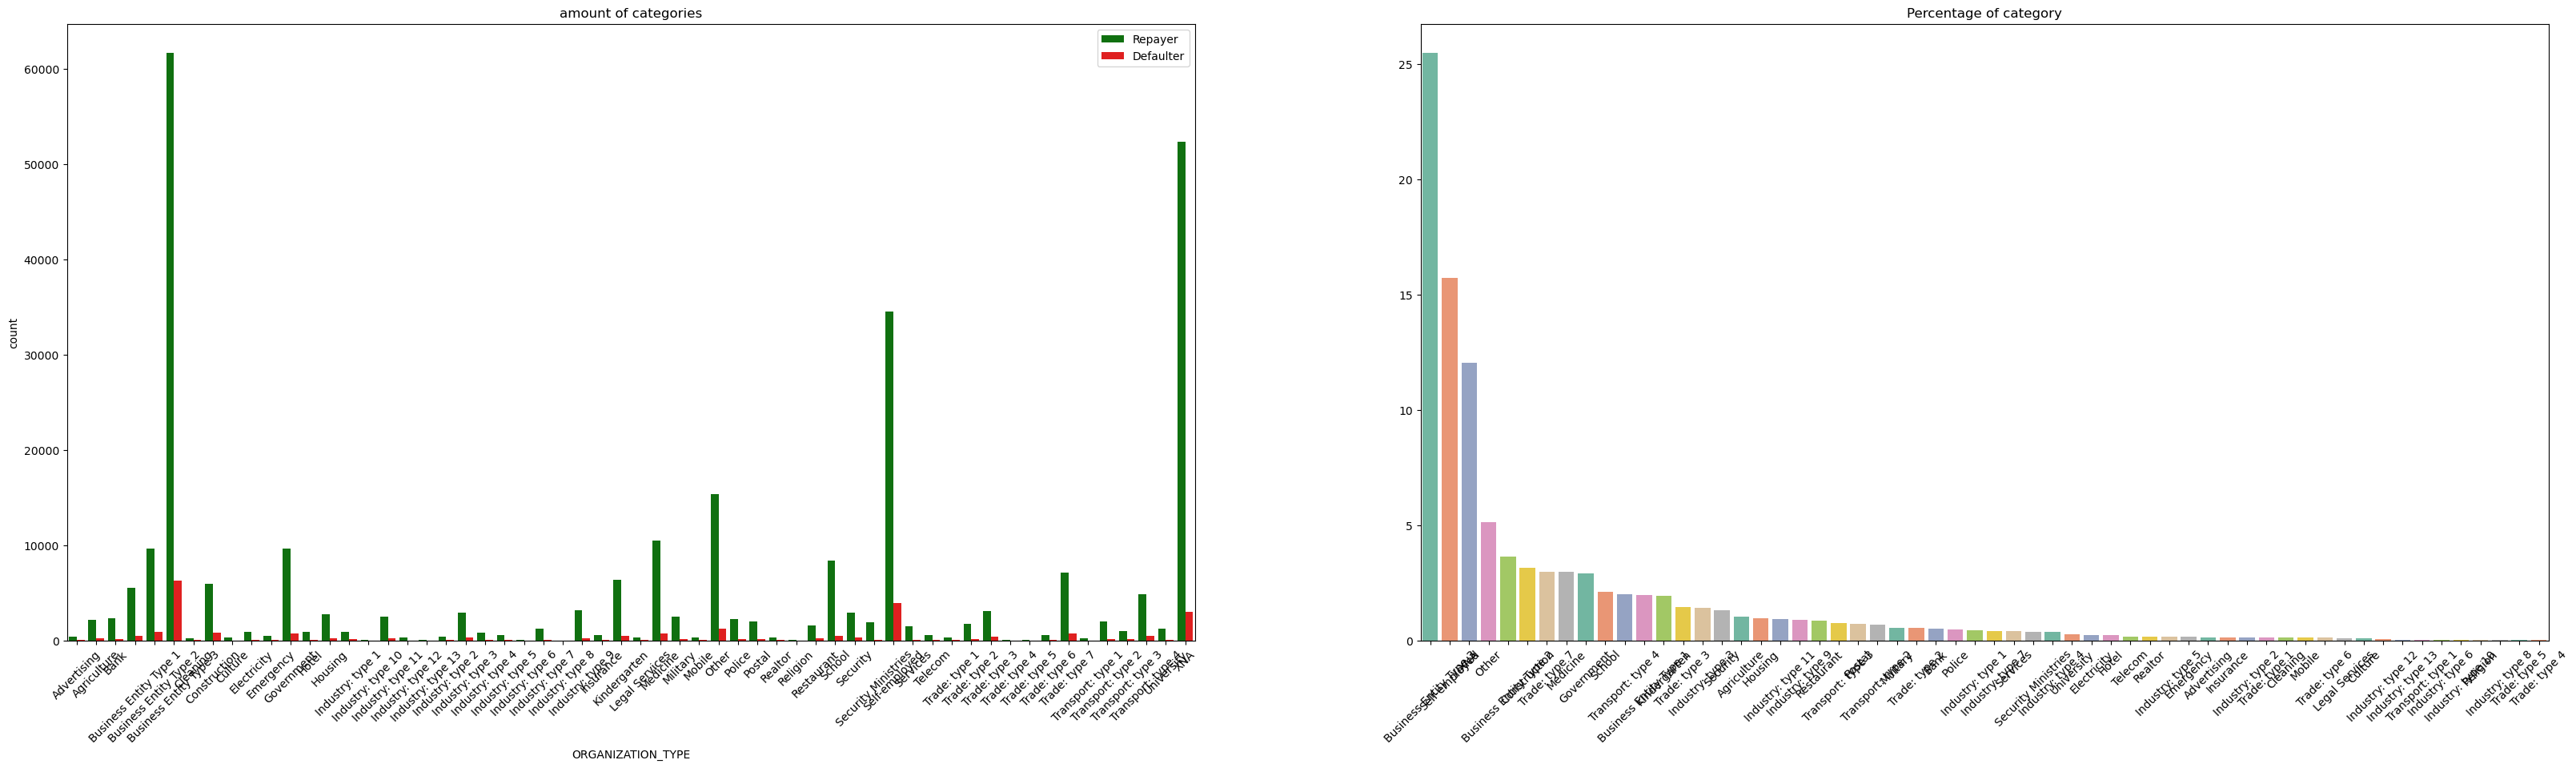

In [128]:
univariate_categorical("ORGANIZATION_TYPE",(40,10),True,True)

Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).\
Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.\
Most of the people application for loan are from Business Entity Type 3.\
For a very high number of applications, Organization type information is unavailable(XNA).\
It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:\
Trade Type 4 and 5
Industry type 8

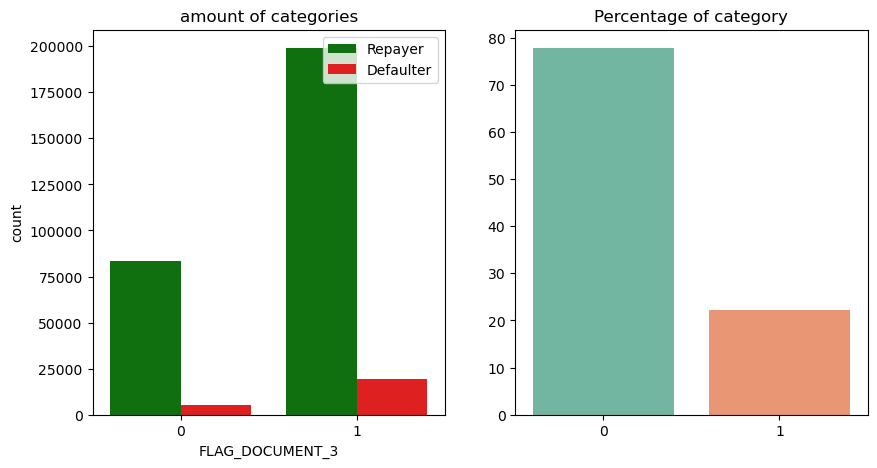

In [110]:
univariate_categorical("FLAG_DOCUMENT_3",(10,5),False,False)

There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%).

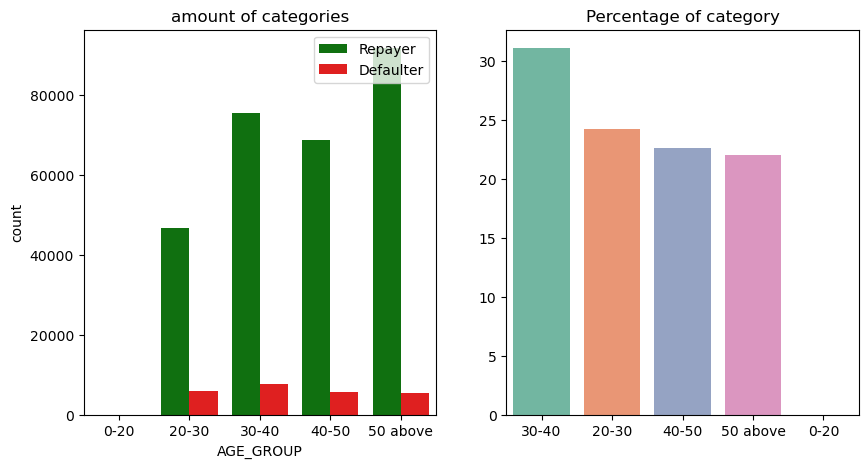

In [111]:
univariate_categorical("AGE_GROUP",(10,5),False,False)

People in the age group range 20-40 have higher probability of defaulting
People above age of 50 have low probability of defailting

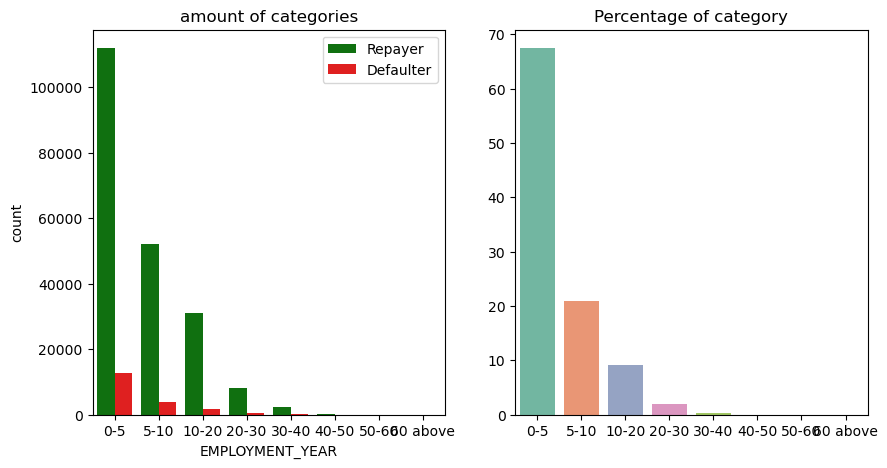

In [112]:
univariate_categorical("EMPLOYMENT_YEAR",False,False)

Majority of the applicants have been employeed in between 0-5 years.\
The defaulting rating of this group is also the highest which is 10%.\
With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate

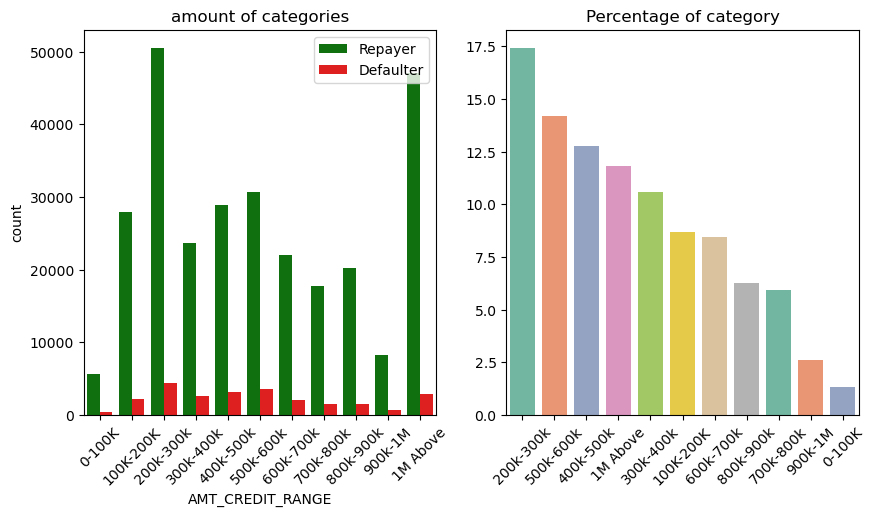

In [113]:
univariate_categorical("AMT_CREDIT_RANGE",True,True)

More than 80% of the loan provided are for amount less than 900,000
People who get loan for 300-600k tend to default more than others.

['100K-200K', '0-100K', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', '800k-900k', '700k-800k', '900k-1M', '1M Above']


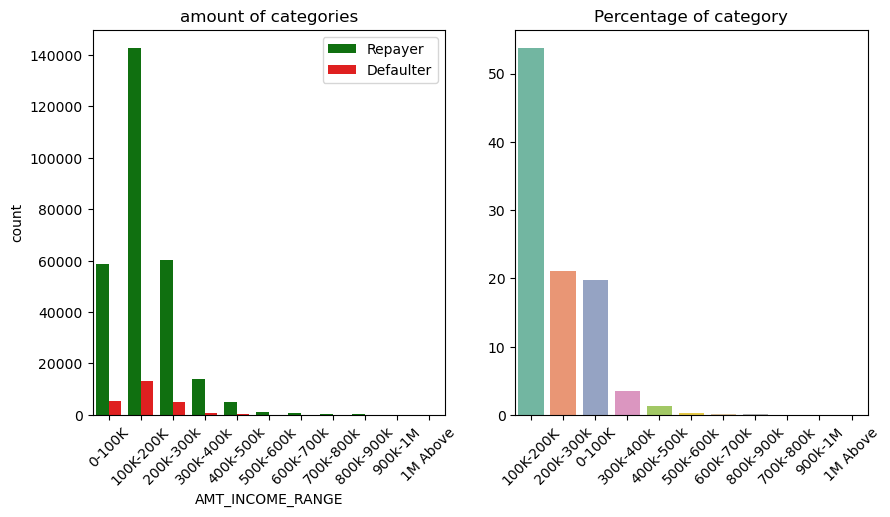

In [166]:
univariate_categorical("AMT_INCOME_RANGE",(10,5),True,True)

90% of the applications have Income total less than 300,000\
Application with Income less than 300,000 has high probability of defaulting\
Applicant with Income more than 700,000 are less likely to default

Text(0.5, 1.0, 'Percentage of Default')

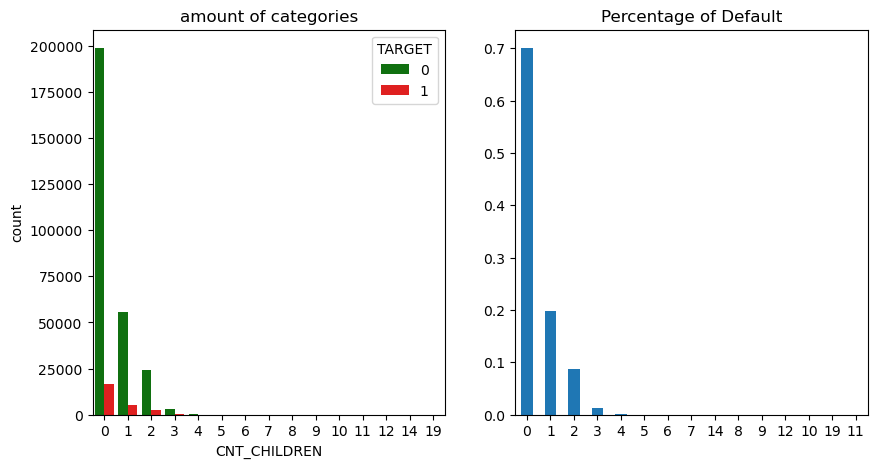

In [186]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='CNT_CHILDREN', data=app_df,hue='TARGET',palette=['g','r'],ax=ax[0])
app_df['CNT_CHILDREN'].value_counts(normalize=True).plot(kind='bar',rot=0)
ax[0].set_title('amount of categories')
ax[1].set_title('Percentage of Default')

Most of the applicants do not have children\
Very few clients have more than 3 children.\
Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rates

Text(0.5, 1.0, 'Percentage of Default')

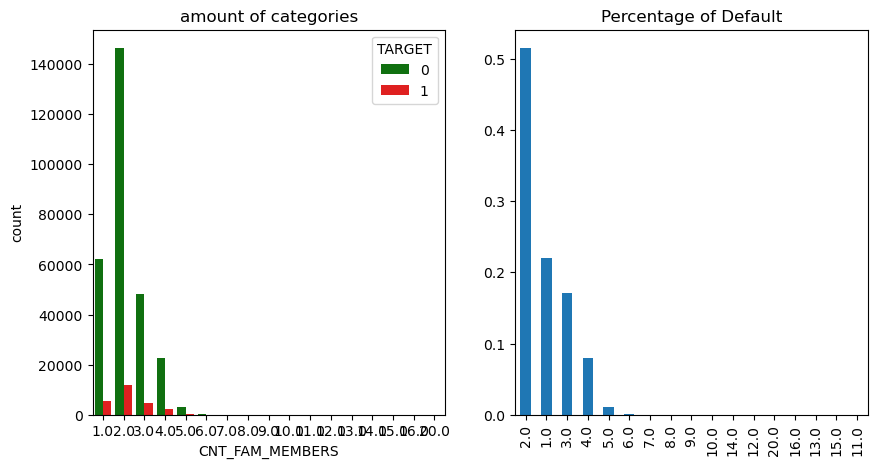

In [187]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='CNT_FAM_MEMBERS', data=app_df,hue='TARGET',palette=['g','r'],ax=ax[0])
app_df['CNT_FAM_MEMBERS'].value_counts(normalize=True).plot(kind='bar')
ax[0].set_title('amount of categories')
ax[1].set_title('Percentage of Default')

Family member follows the same trend as children where having more family members increases the risk of defaulting

In [125]:
def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue,palette=['g','r']) 
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper right',labels=['Repayer','Defaulter'])
    plt.show()

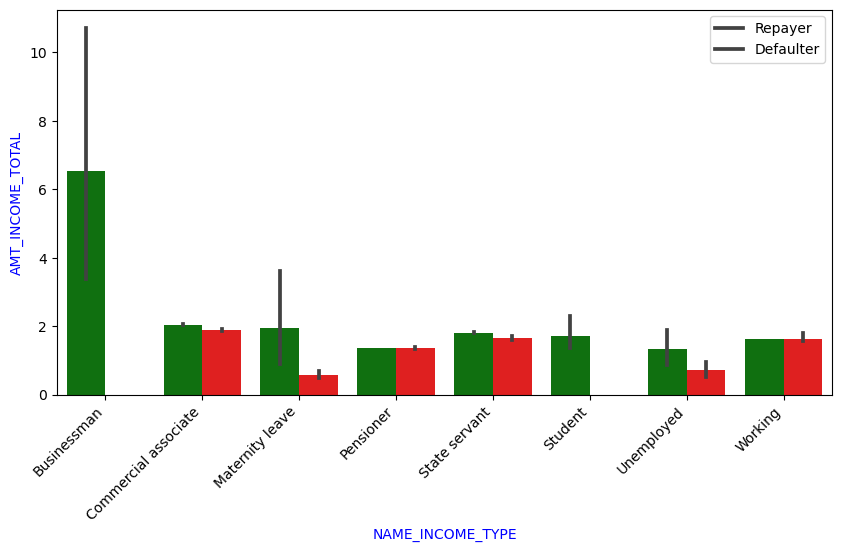

In [126]:
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",app_df,"TARGET",(10,5))

It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

## Numeric Variables Analysis

In [118]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = app_df.loc[app_df['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = app_df.loc[app_df['TARGET']==1, cols_for_correlation] # Defaulters

In [119]:
corr_repayer=Repayer_df.corr()

In [127]:
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer= corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
71,AMT_ANNUITY,AMT_CREDIT,0.771309
167,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
138,DAYS_BIRTH,CNT_CHILDREN,0.336966
190,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


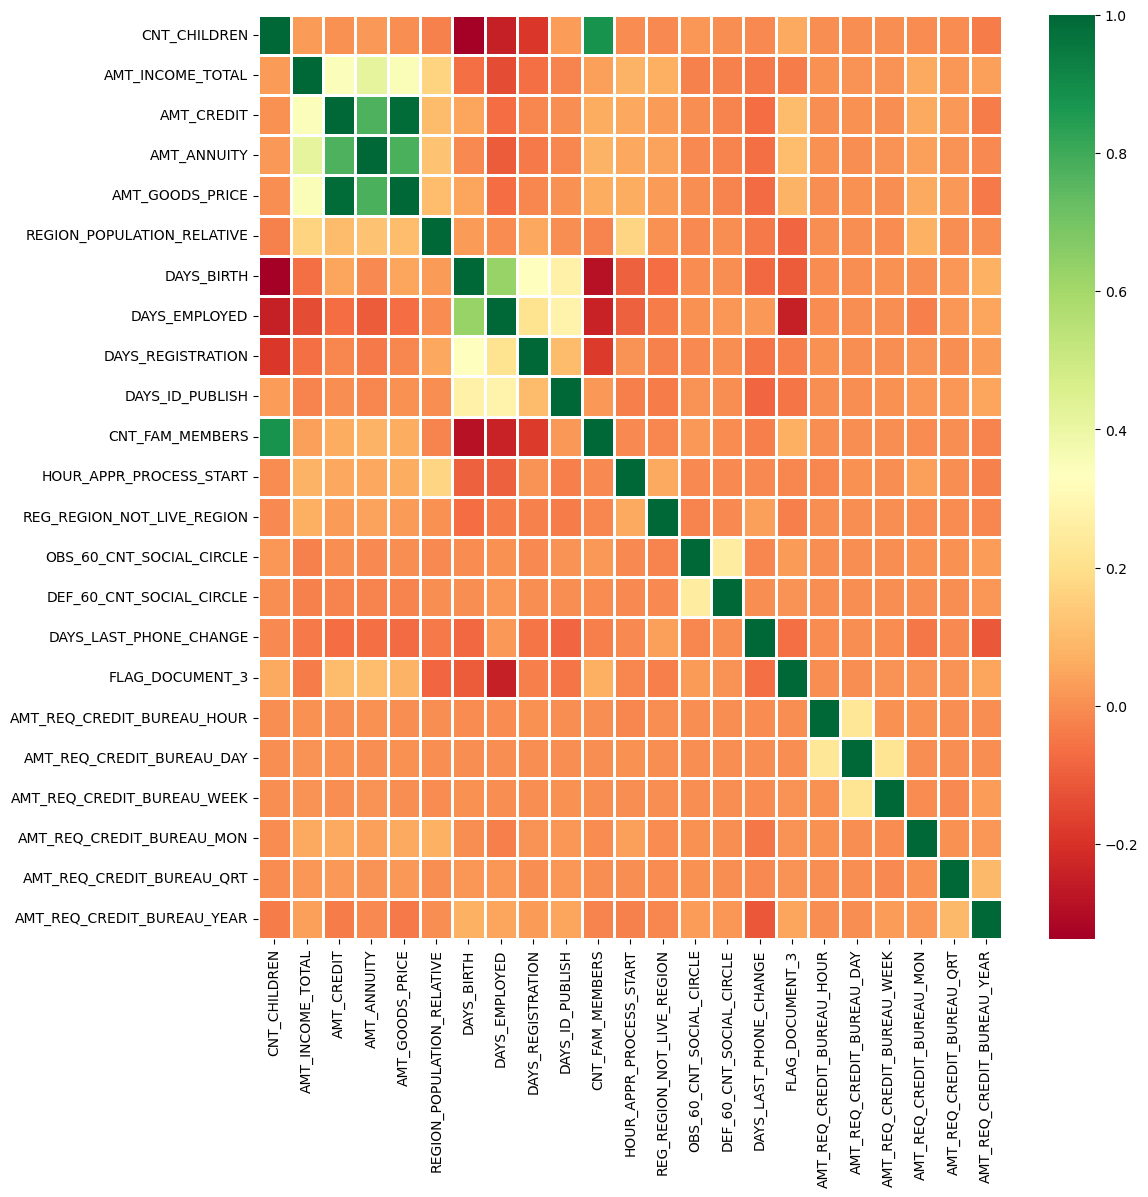

In [128]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

Correlating factors amongst repayers:\
Credit amount is highly correlated with\
amount of goods price\
loan annuity\
total income\
We can also see that repayers have high correlation in number of days employed.


In [129]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
71,AMT_ANNUITY,AMT_CREDIT,0.752195
167,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
190,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
375,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.272169
335,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264159
138,DAYS_BIRTH,CNT_CHILDREN,0.259109
213,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863


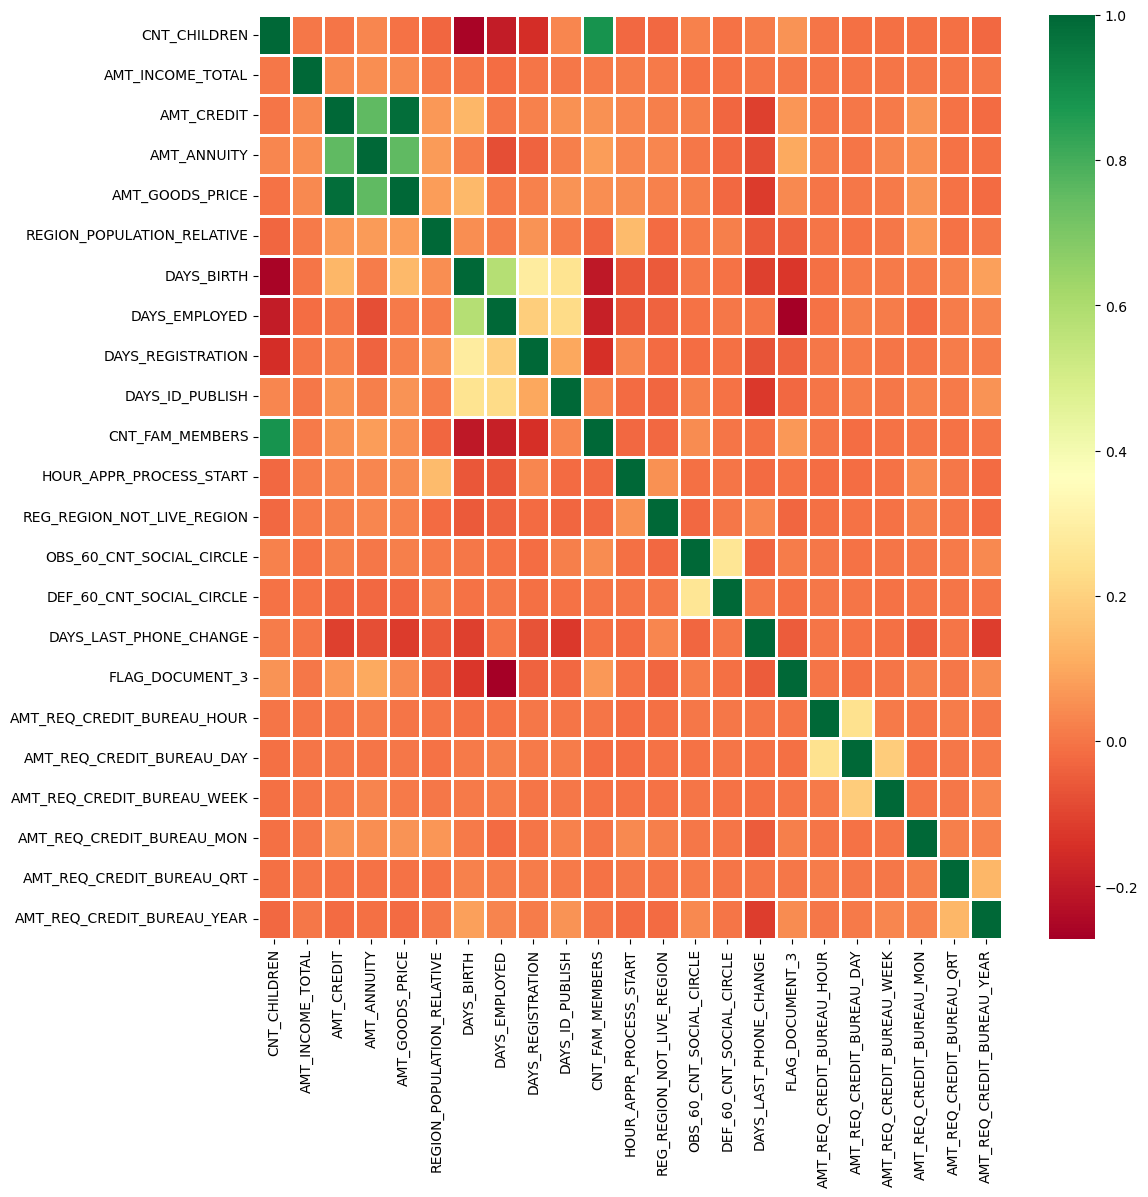

In [130]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

Credit amount is highly correlated with amount of goods price which is same as repayers.\
But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)\
We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).\
There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.\
Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.\
There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

##  Numerical Univariate Analysis

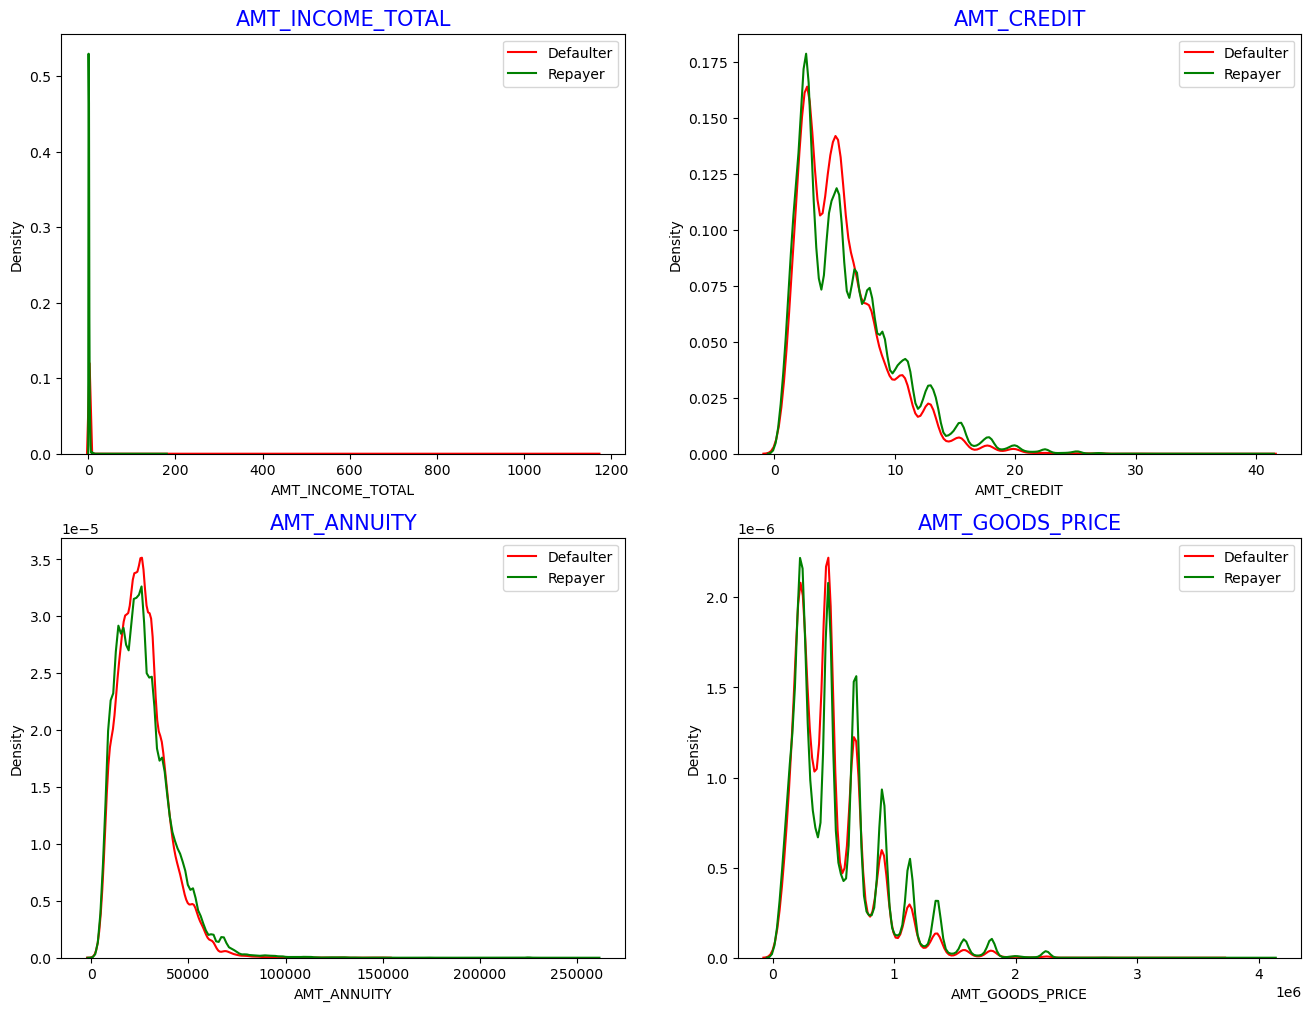

In [158]:
#Plotting the numerical columns related to amount as distribution plot to see density
amount = app_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i,j in enumerate(amount):
    plt.subplot(2,2,i+1)
    sns.distplot(Defaulter_df[j], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[j], hist=False, color='g', label ="Repayer")
    plt.title(j, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend()
    
plt.show()


Most no of loans are given for goods price below 10 lakhs\
Most people pay annuity below 50000 for the credit loan\
Credit amount of the loan is mostly less then 10 lakhs\
The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision.

## Numerical Bivariate Analysis

In [176]:
def bivariate_rel(x,y,kind,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=app_df, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

<Figure size 1500x600 with 0 Axes>

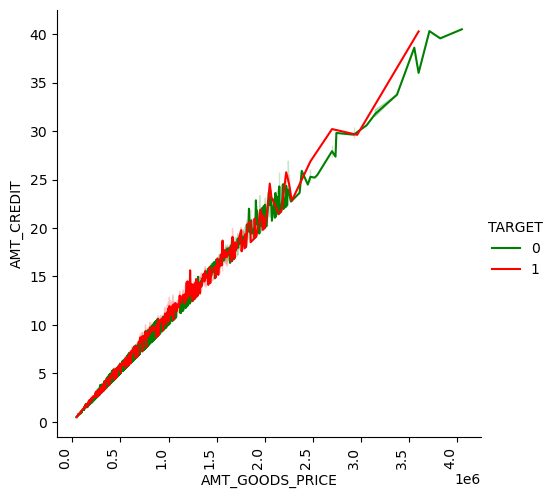

In [177]:
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT', "line",(15,6))

When the credit amount goes beyond 3M, there is an increase in defaulters.

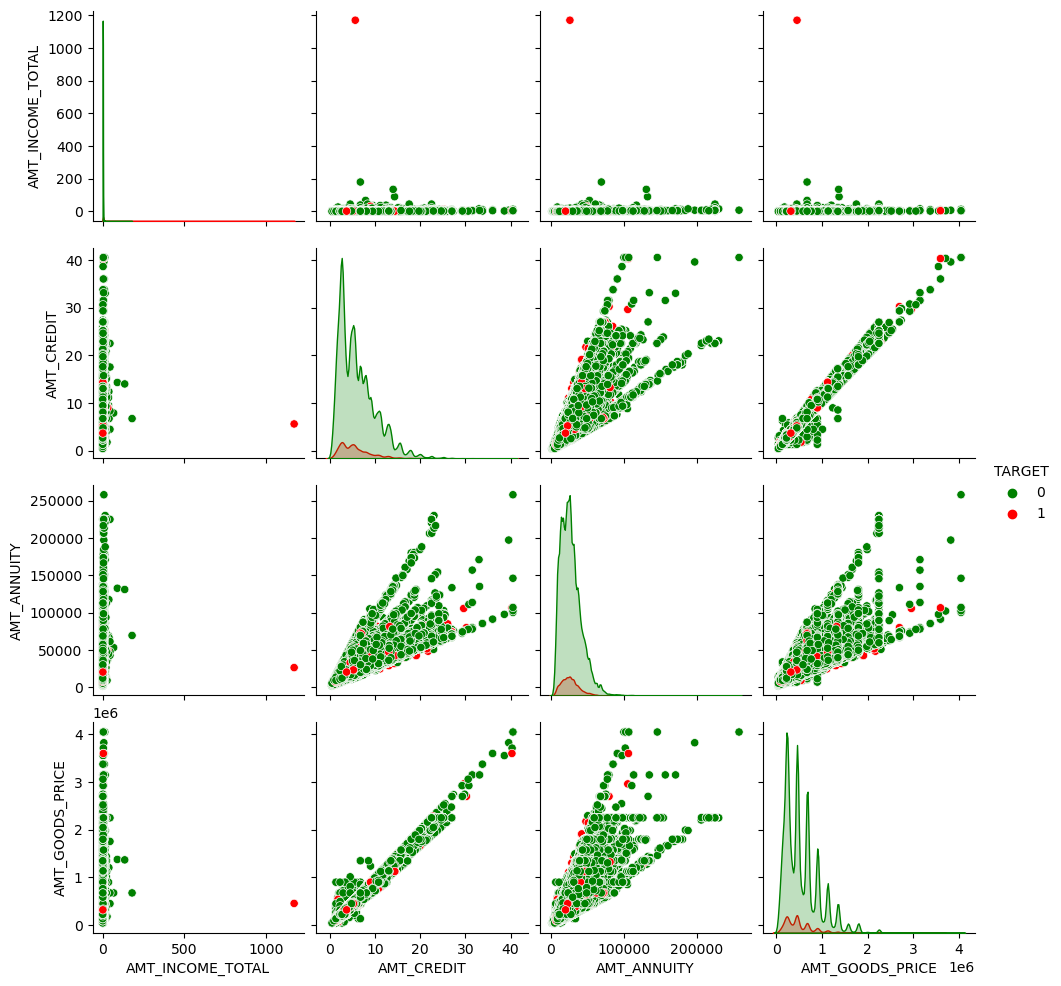

In [189]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = app_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
plt.show()

When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters.\
AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line\
There are very less defaulters for AMT_CREDIT >3M\
Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section

In [ ]:
## Merged Dataframes Analysi

In [191]:
loan_process_df = pd.merge(app_df, prev_app_df, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,200k-300k,400k-500k,25,20-30,1,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-100K,100K-200K,52,50 above,0,NaN,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,800-1200


In [192]:
loan_process_df.shape

(1413701, 74)

In [222]:
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [194]:
loan_process_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701702e+04,5.277186e+05,2.074985e-02,1.632105e+04,7.266347e+04,5.003233e+03,3.034563e+03,2.150501e+00,1.198433e+01,1.207327e-02,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,-1.084701e+03,7.385600e-01,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.691239e+00,4.421384e+01,1.985500e+02,1.922744e+06,1.484032e+04,1.752436e+05,1.963541e+05,1.854396e+05,8.803670e+02,3.149878e+02,1.256367e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.433374e+05,3.551051e+03,1.507376e+03,9.006787e-01,3.232181e+00,1.092132e-01,2.530715e+00,4.658973e-01,2.508953e+00,3.790588e-01,7.999369e+02,4.394192e-01,7.702591e-02,1.001966e-01,2.012902e-01,9.268428e-01,8.781444e-01,2.157176e+00,1.190217e+01,3.926378e+02,5.327153e+05,1.316370e+04,2.936222e+05,3.194813e+05,2.881244e+05,7.835402e+02,7.695082e+03,1.448807e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.292000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.700000e+00,1.682100e+04,2.385000e+05,1.003200e-02,1.273900e+04,1.042000e+03,2.001000e+03,1.783000e+03,2.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.683000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,1.461346e+06,7.406055e+03,1.975050e+04,2.488050e+04,4.500000e+04,2.710000e+02,-1.000000e+00,0.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.084955e+00,2.492550e+04,4.500000e+05,1.885000e-02,1.604400e+04,2.401000e+03,4.508000e+03,3.330000e+03,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.011000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.300000e+01,6.000000e+00,1.922698e+06,1.125000e+04,7.087050e+04,8.059500e+04,7.087500e+04,5.820000e+02,4.000000e+00,1.000000e+01
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+00,8.079840e+00,3.454200e+04,6.795000e+05,2.866300e-02,1.998000e+04,6.313000e+03,7.510000e+03,4.319000e+03,3.000000e+00,1.400000e+01,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,-3.960000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,5.400000e+01,1.700000e+01,2.384012e+06,1.67479

In [195]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

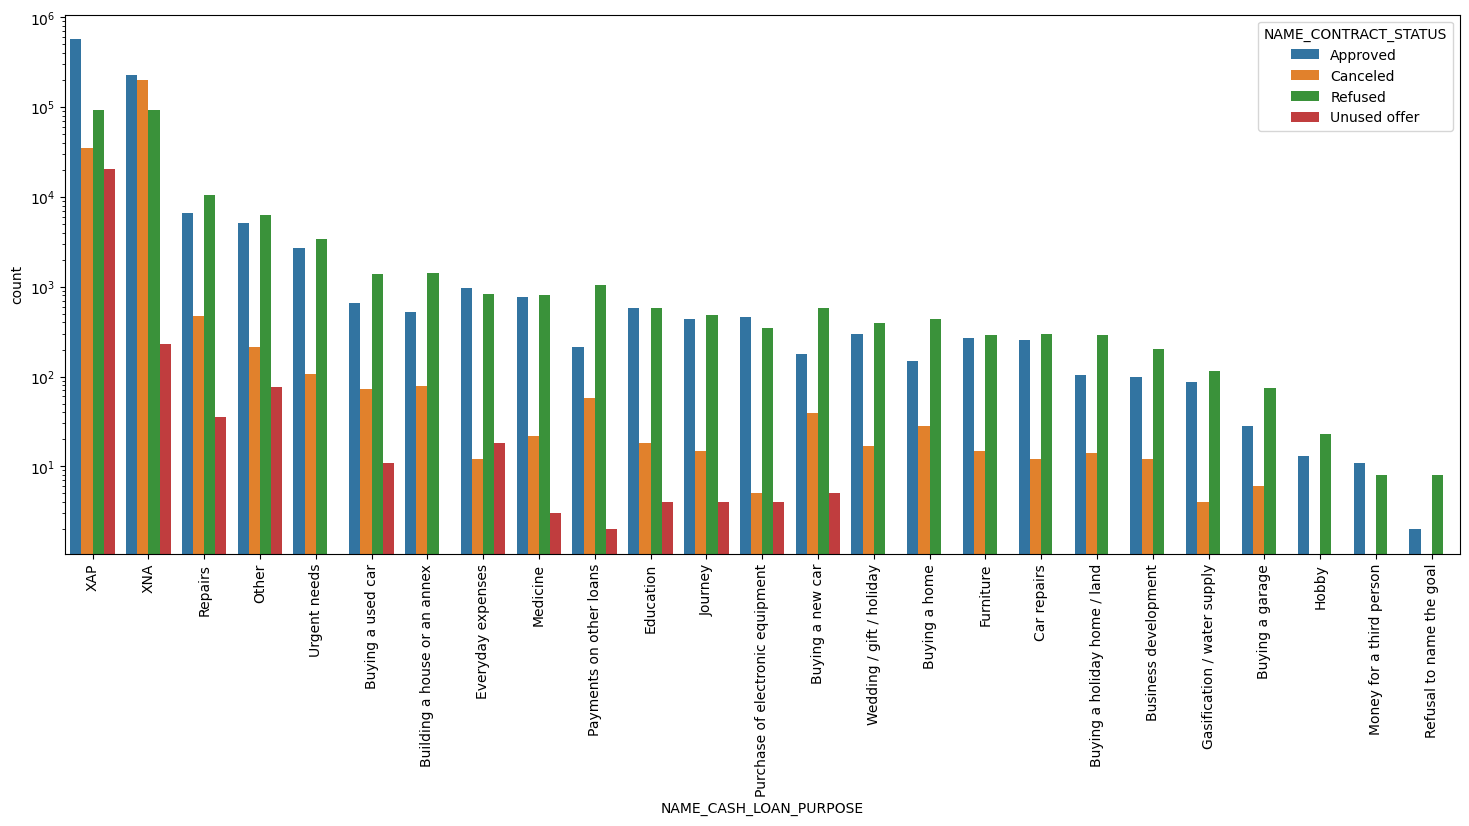

In [217]:
plt.figure(figsize=(18,7))
sns.countplot(x="NAME_CASH_LOAN_PURPOSE",data=L0,hue="NAME_CONTRACT_STATUS",order=L0["NAME_CASH_LOAN_PURPOSE"].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')

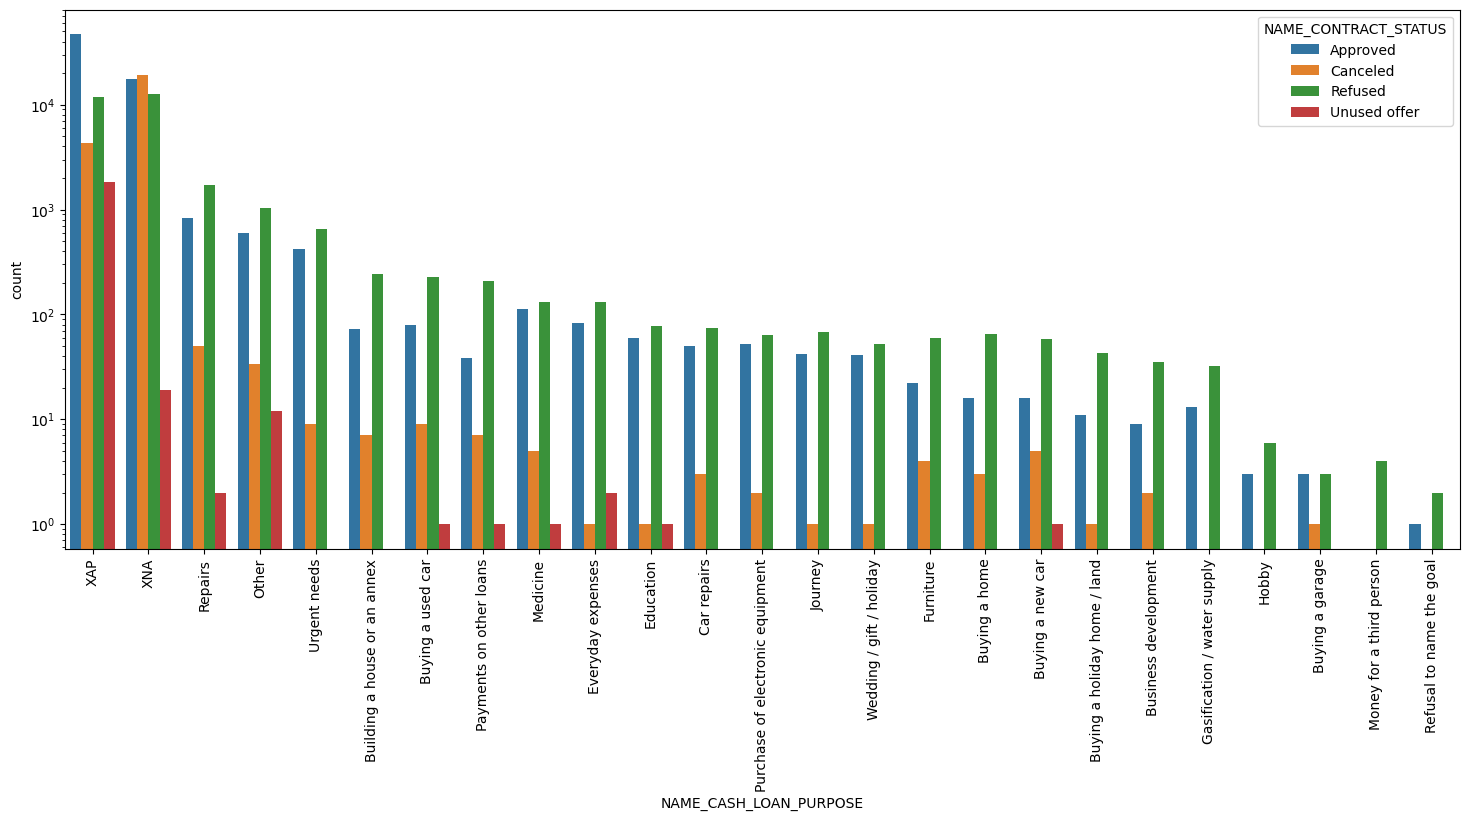

In [219]:
plt.figure(figsize=(18,7))
sns.countplot(x="NAME_CASH_LOAN_PURPOSE",data=L1,hue="NAME_CONTRACT_STATUS",order=L1["NAME_CASH_LOAN_PURPOSE"].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')

Loan purpose has high number of unknown values (XAP, XNA)\
Loan taken for the purpose of Repairs seems to have highest default rate\
A very high number application have been rejected by bank or refused by client which has purpose as repair or other.\
This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

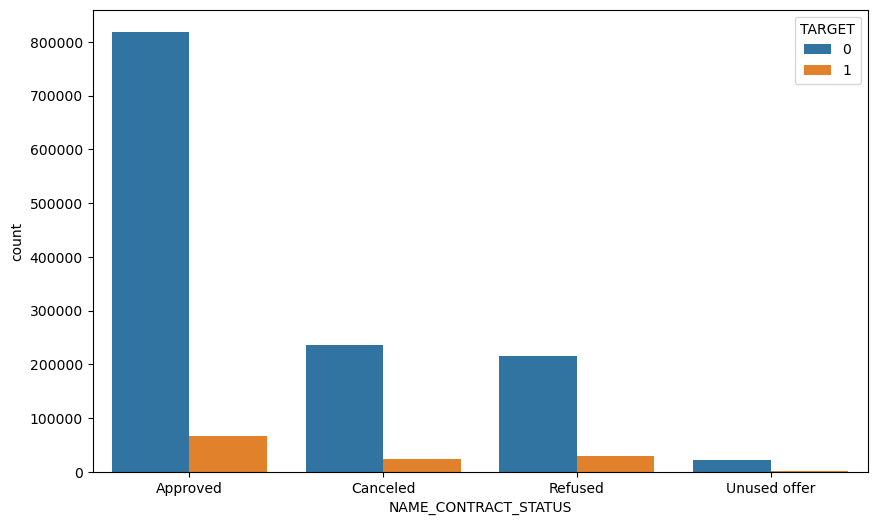

In [224]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
sns.countplot(x='NAME_CONTRACT_STATUS',data=loan_process_df,hue='TARGET')

In [225]:
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients\
88% of the clients who have been previously refused a loan has payed back the loan in current case.\
Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer.

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

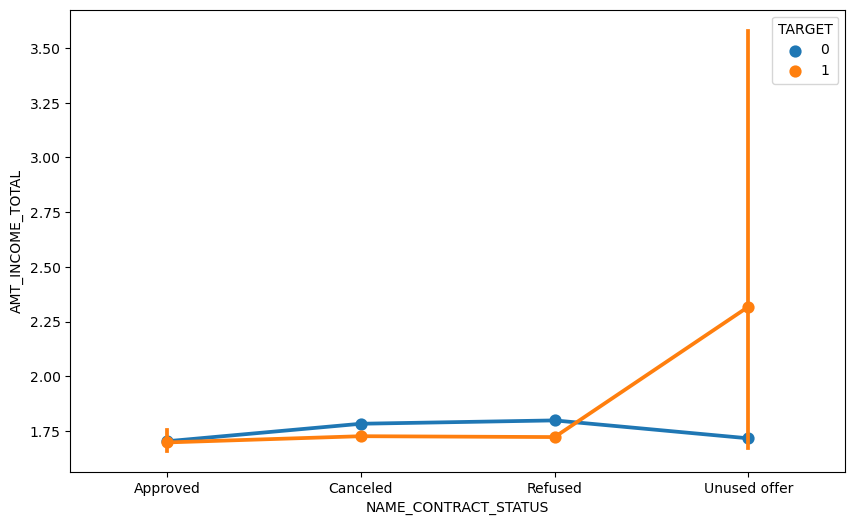

In [228]:
#plotting the relationship between income total and contract status
sns.pointplot(x="NAME_CONTRACT_STATUS",y='AMT_INCOME_TOTAL',hue='TARGET',data=loan_process_df)

The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others.

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

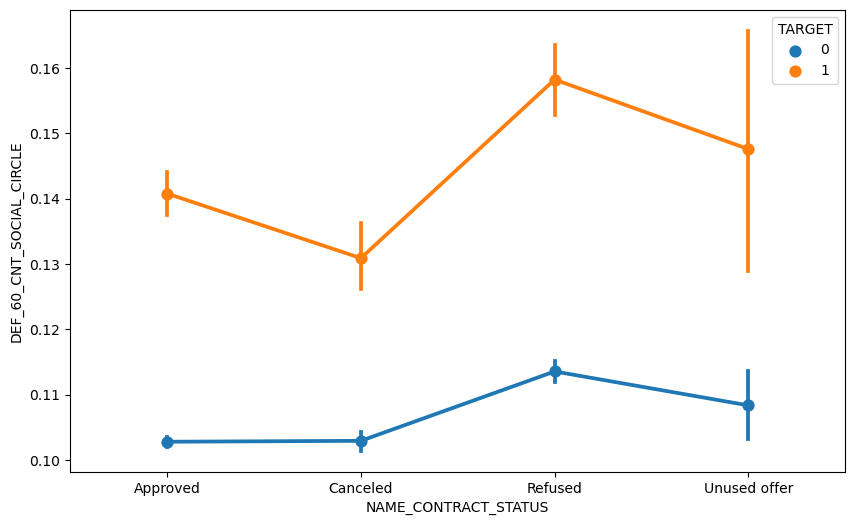

In [229]:
sns.pointplot(x="NAME_CONTRACT_STATUS",y='DEF_60_CNT_SOCIAL_CIRCLE',hue='TARGET',data=loan_process_df)

Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.

# Conclusions

After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization:

### Decisive Factor whether an applicant will be Repayer:
1. NAME_EDUCATION_TYPE: Academic degree has less defaults.
2. NAME_INCOME_TYPE: Student and Businessmen have no defaults.
3. REGION_RATING_CLIENT: RATING 1 is safer.
4. ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%
5. DAYS_BIRTH: People above age of 50 have low probability of defaulting
6. DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate
7. AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default
8. NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.
9. CNT_CHILDREN: People with zero to two children tend to repay the loans.

### Decisive Factor whether an applicant will be Defaulter:
1. CODE_GENDER: Men are at relatively higher default rate
2. NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.
3. NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education
4. NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.
5. REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.
6. OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.
7. ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
8. DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting
9. DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.
10. CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.
11. AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.

#### The following attributes indicate that people from these category tend to default but then due to the number of people and the amount of loan, the bank could provide loan with higher interest to mitigate any default risk thus preventing business loss:

1. NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.
2. AMT_CREDIT: People who get loan for 300-600k tend to default more than others and hence having higher interest specifically for this credit range would be ideal.
3. AMT_INCOME: Since 90% of the applications have Income total less than 300,000 and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.
4. CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.
5. NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.

#### Other suggestions:
1. 90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.
2. 88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.